<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 20px; 
    background: linear-gradient(125deg, #d73027 7%, #fdae61 47%, #a6d96a 85%, #1a9850 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Customer Churn 📉
    </h1>
</div>


# 📂 Overview

* **Background** <br>
Every bank wants to hold there customers for sustaining their business. Understanding the reasons why customers leave will help banks improve retention policies and reduce costs.

* **Goal of the Project** <br>
Based on the data, we will find out what causes customers to leave and then come up with appropriate strategies to help the bank.

🧾 **Key Features**

🎯 **Target Variable** <br>
- `Exited`: *whether or not the customer left the bank.*

**General Property Characteristics** <br>
- `RowNumber`: Corresponds to the record (row) number and has no effect on the output.
- `CustomerId`: Contains random values and has no effect on customer leaving the bank.
- `Surname`: The surname of a customer has no impact on their decision to leave the bank.
- `CreditScore`: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- `Geography`: A customer’s location can affect their decision to leave the bank.
- `Gender`: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- `Age`: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- `Tenure`: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- `Balance`: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- `NumOfProducts`: Refers to the number of products that a customer has purchased through the bank.
- `HasCrCard`: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- `IsActiveMember`: Active customers are less likely to leave the bank.
- `EstimatedSalary`: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- `Complain`: Customer has complaint or not.
- `Satisfaction`: Score—Score provided by the customer for their complaint resolution.
- `Card Type`: Type of card hold by the customer.
- `Points Earned`: The points earned by the customer for using credit card.

📁 **Files Provided**

* `Customer-Churn-Records.csv`: the dataset.

(Source: [Kaggle Dataset](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data)) 


🎯 **Project Objective**

The primary objective of this notebook is to **EDA and build machine learning model to predict**.

Key components of the approach include:

* **🔍 Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **⚙️ Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **📈 Modeling:** Train with some models and choise the best model for predicting.
* **🔢 Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **🧪 Evaluation Framework:** <br>
  * Cross-validation.
  * Metrics: Accuracy, F1-score, ROC-AUC, Confusion matrix

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [331]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [332]:
# Load the datasets
df_customer_churn = pd.read_csv("Customer-Churn-Records.csv")
# Verify shapes
print("Data Shape:", df_customer_churn.shape)

Data Shape: (10000, 18)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [333]:
# Display few rows of dataset
print("Data Preview:")
display(df_customer_churn.head())

Data Preview:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [334]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **10000** samples with **18** columns, including the target variable `Exited`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`, `Points Earned`.
     - **Categorical features:** `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `Complain`, `Card Type`, `Satisfaction Score`, `NumOfProducts`.
   - The target variable is **int64** value but we need to convert to **int8** to save memory usage.

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns `Surname`, `RowNumber`, `CustomerId` are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [335]:
df_customer_churn.drop(columns="Surname", axis=1, inplace=True)
df_customer_churn.drop(columns="RowNumber", axis=1, inplace=True)
df_customer_churn.drop(columns="CustomerId", axis=1, inplace=True)

In [336]:
df_customer_churn.columns = (
    df_customer_churn.columns
    .str.strip()
    .str.replace(" ", "")
)

In [337]:
print("Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_customer_churn.drop(columns=["Geography", "Gender", "HasCrCard", "IsActiveMember", "Complain", "CardType", 
                "SatisfactionScore", "NumOfProducts", "Exited"], axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
PointEarned,10000.000000,606.515100,225.924839,119.000000,410.000000,605.000000,801.000000,1000.000000


## Descriptive Insights from Dataset Statistics

**Overview of Features:**

* **CreditScore**

  * Mean: 650.53
  * Standard deviation: 96.65 → Indicates relatively high dispersion.
  * Value range: From 350 to 850 → Spanning from poor to excellent credit levels

* **Age**

  * Mean: 38.92 years, ranging from 18 to 92 years
  * 25th percentile: 32, 75th percentile: 44 → Primarily concentrated in working-age adults

* **Tenure**

  * Average: 5 years
  * Range: 0 to 10 years → Evenly distributed across customer loyalty durations

* **Balance**

  * High average value: \$76,486, but large standard deviation (\$62,397) → Significant disparity among customers
  * 25% of customers have a balance of \$0 → May indicate low usage or drained accounts

* **EstimatedSalary**

  * Average: \$100,090, considered relatively high
  * Wide range from \$11.58 to \$199,992
  * Median close to the mean → Fairly uniform distribution

* **PointEarned**

  * Mean: 606.52
  * Spread between 119 and 1000 points → Possibly reflects customer engagement or value

**General Observations:**

* The dataset has a **large sample size** (10,000 entries), suitable for reliable quantitative analysis.
* Some variables (e.g., `Balance`, `EstimatedSalary`, `CreditScore`) exhibit relatively high dispersion or standard deviation, suggesting the need for further inspection into potential skewness or the presence of outliers.
* Most customers fall within the working-age demographic and demonstrate moderate to long-term retention, as indicated by an average tenure of 5 years.
* Meanwhile, variations in credit scores and reward points reflect a diverse spectrum of financial behaviors and customer engagement levels.

In [338]:
cat_features = ["Geography", "Gender", "CardType"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_customer_churn)

In [339]:
# Cast type features to save memory.
df_customer_churn["CreditScore"] = df_customer_churn["CreditScore"].astype("int16")
df_customer_churn["Age"] = df_customer_churn["Age"].astype("int8")
df_customer_churn["Tenure"] = df_customer_churn["Tenure"].astype("int8")
df_customer_churn["Balance"] = df_customer_churn["Balance"].astype("float32")
df_customer_churn["Exited"] = df_customer_churn["Exited"].astype("int8")
df_customer_churn["PointEarned"] = df_customer_churn["PointEarned"].astype("int16")
df_customer_churn["EstimatedSalary"] = df_customer_churn["EstimatedSalary"].astype("float32")

df_customer_churn["HasCrCard"] = df_customer_churn["HasCrCard"].astype("int8")
df_customer_churn["IsActiveMember"] = df_customer_churn["IsActiveMember"].astype("int8")
df_customer_churn["Complain"] = df_customer_churn["Complain"].astype("int8")
df_customer_churn["SatisfactionScore"] = df_customer_churn["SatisfactionScore"].astype("int8")
df_customer_churn["NumOfProducts"] = df_customer_churn["NumOfProducts"].astype("int8")

In [340]:
# Display information about the DataFrames
print("Data Info:")
df_customer_churn.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int16   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Age                10000 non-null  int8    
 4   Tenure             10000 non-null  int8    
 5   Balance            10000 non-null  float32 
 6   NumOfProducts      10000 non-null  int8    
 7   HasCrCard          10000 non-null  int8    
 8   IsActiveMember     10000 non-null  int8    
 9   EstimatedSalary    10000 non-null  float32 
 10  Exited             10000 non-null  int8    
 11  Complain           10000 non-null  int8    
 12  SatisfactionScore  10000 non-null  int8    
 13  CardType           10000 non-null  category
 14  PointEarned        10000 non-null  int16   
dtypes: category(3), float32(2), int16(2), int8(

In [341]:
category_cols = ["HasCrCard", "IsActiveMember", "Complain", "SatisfactionScore", "NumOfProducts"]
df_customer_churn[category_cols] = df_customer_churn[category_cols].astype("category")
print("Data describe:")
df_customer_churn.describe(include=["category", "object"]).T

Data describe:


,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Complain,10000,2,0,7956
SatisfactionScore,10000,5,3,2042
CardType,10000,4,DIAMOND,2507


## Insights on Categorical Features

`Geography`

* Contains **3 countries**: `France`, `Germany`, and `Spain`
* Frequency:

  * `France`: 5,014 (≈ 50%) → **dominant group**
* **Remarks**:

  * Data is slightly skewed toward customers from France
  * It's recommended to analyze churn distribution by geography, as location may influence financial behavior

`Gender`

* Two values: `Male` and `Female`
* `Male` accounts for **5,457 out of 10,000** → approx. **54.6%**
* **Remarks**:

  * Gender distribution is relatively balanced
  * Consider analyzing the relationship between gender and churn or credit score

**`NumOfProducts`**

* Four distinct values: `1, 2, 3, 4`
* **Most common value: 1** → 5,084 customers (≈ 51%)
* **Remarks**:

  * Most customers use **only one banking product**
  * Consider analyzing churn by number of products (customers with fewer products might be more likely to leave)

`HasCrCard`

* Two values: `1` (yes) and `0` (no)
* `1` makes up 7,055 (≈ 70.5%) → most customers **have a credit card**
* **Remarks**:

  * We need to analyze whether having a credit card helps reduce churn

`IsActiveMember`

* Two values: `1` (active) and `0` (inactive)
* `1` accounts for 5,151 → approximately **50/50 split**
* **Remarks**:

  * Very suitable as a **feature for churn prediction**
  * Inactive customers may have a higher risk of churn

`Complain`

* Two values: `0` (no complaint), `1` (has complained)
* `0` makes up 7,956 → **≈ 80% have not complained**
* **Remarks**:

  * Low complaint rate may indicate efficient operations or underreporting
  * Worth analyzing if customers who complain are more likely to churn

`SatisfactionScore`

* Five levels: from `1` to `5`
* `3` is the most frequent value (2,042 customers)
* **Remarks**:

  * Satisfaction scores are fairly evenly distributed
  * Analyze churn by satisfaction level (lower scores may indicate higher churn risk)

`CardType`

* Four card types: assumed to be `DIAMOND`, `GOLD`, `SILVER`, `PLATINUM`
* `DIAMOND` is the most common: 2,507 customers
* **Remarks**:

  * We need to analyze churn by card type may reveal which cards retain customers better

**Summary of Key Observations**

| Notable Findings                                   | Suggested Follow-up Analysis                         |
| -------------------------------------------------- | ---------------------------------------------------- |
| `France` makes up 50% → slight geographic skew     | Analyze churn by `Geography`                         |
| Majority use only 1 product (`NumOfProducts = 1`)  | Check churn rate among customers with fewer products |
| `IsActiveMember` and `Complain` show good contrast | Likely to be **important features** in the model     |
| `SatisfactionScore` is diverse in distribution     | Analyze churn by customer satisfaction level         |
| `CardType` may reflect customer segmentation       | Analyze churn across different card types    |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value

In [342]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_customer_churn, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 10,000 rows


## Checking duplicate Value

In [343]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_customer_churn, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_customer_churn.duplicated().sum(),
    "total_rows": len(df_customer_churn)
}

🔍 Data Duplicate Analysis
✅ No duplicates found in 10,000 rows


## Checking Outlier Value

In [344]:
num_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "PointEarned"]
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_customer_churn, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,CreditScore,15,"[376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]"
1,Age,359,"[66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, ...]"


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Data: 0 duplicate out of 10000 rows.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [345]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [346]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Exited Distribution

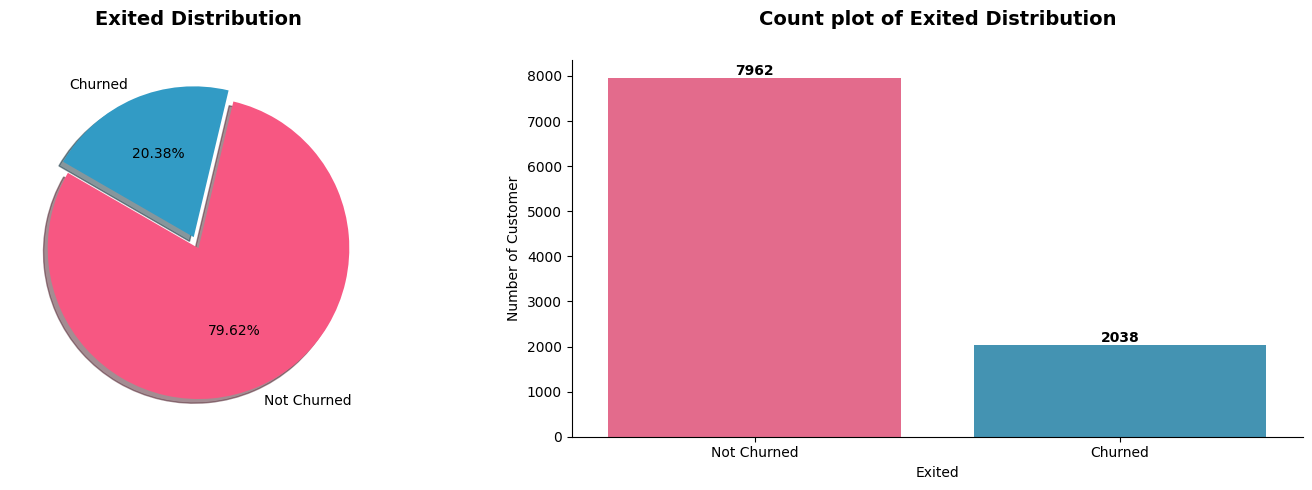

In [347]:
exited_Distribution  = df_customer_churn["Exited"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    exited_Distribution,
    labels = ["Not Churned", "Churned"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Exited Distribution", weight="bold", fontsize=14, pad=25)

# ax[1]
sns.countplot(data=df_customer_churn, x = "Exited", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Exited Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_ylabel("Number of Customer")
ax[1].set_xticks([0, 1], ["Not Churned", "Churned"])
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Insights:** <br>
- Around 1 in 5 customers has churned, which reflects a realistic churn rate in the banking sector.
- Although the data is imbalanced, it is not incorrect — it naturally reflects actual customer behavior.

## Numerical Feature Distributions

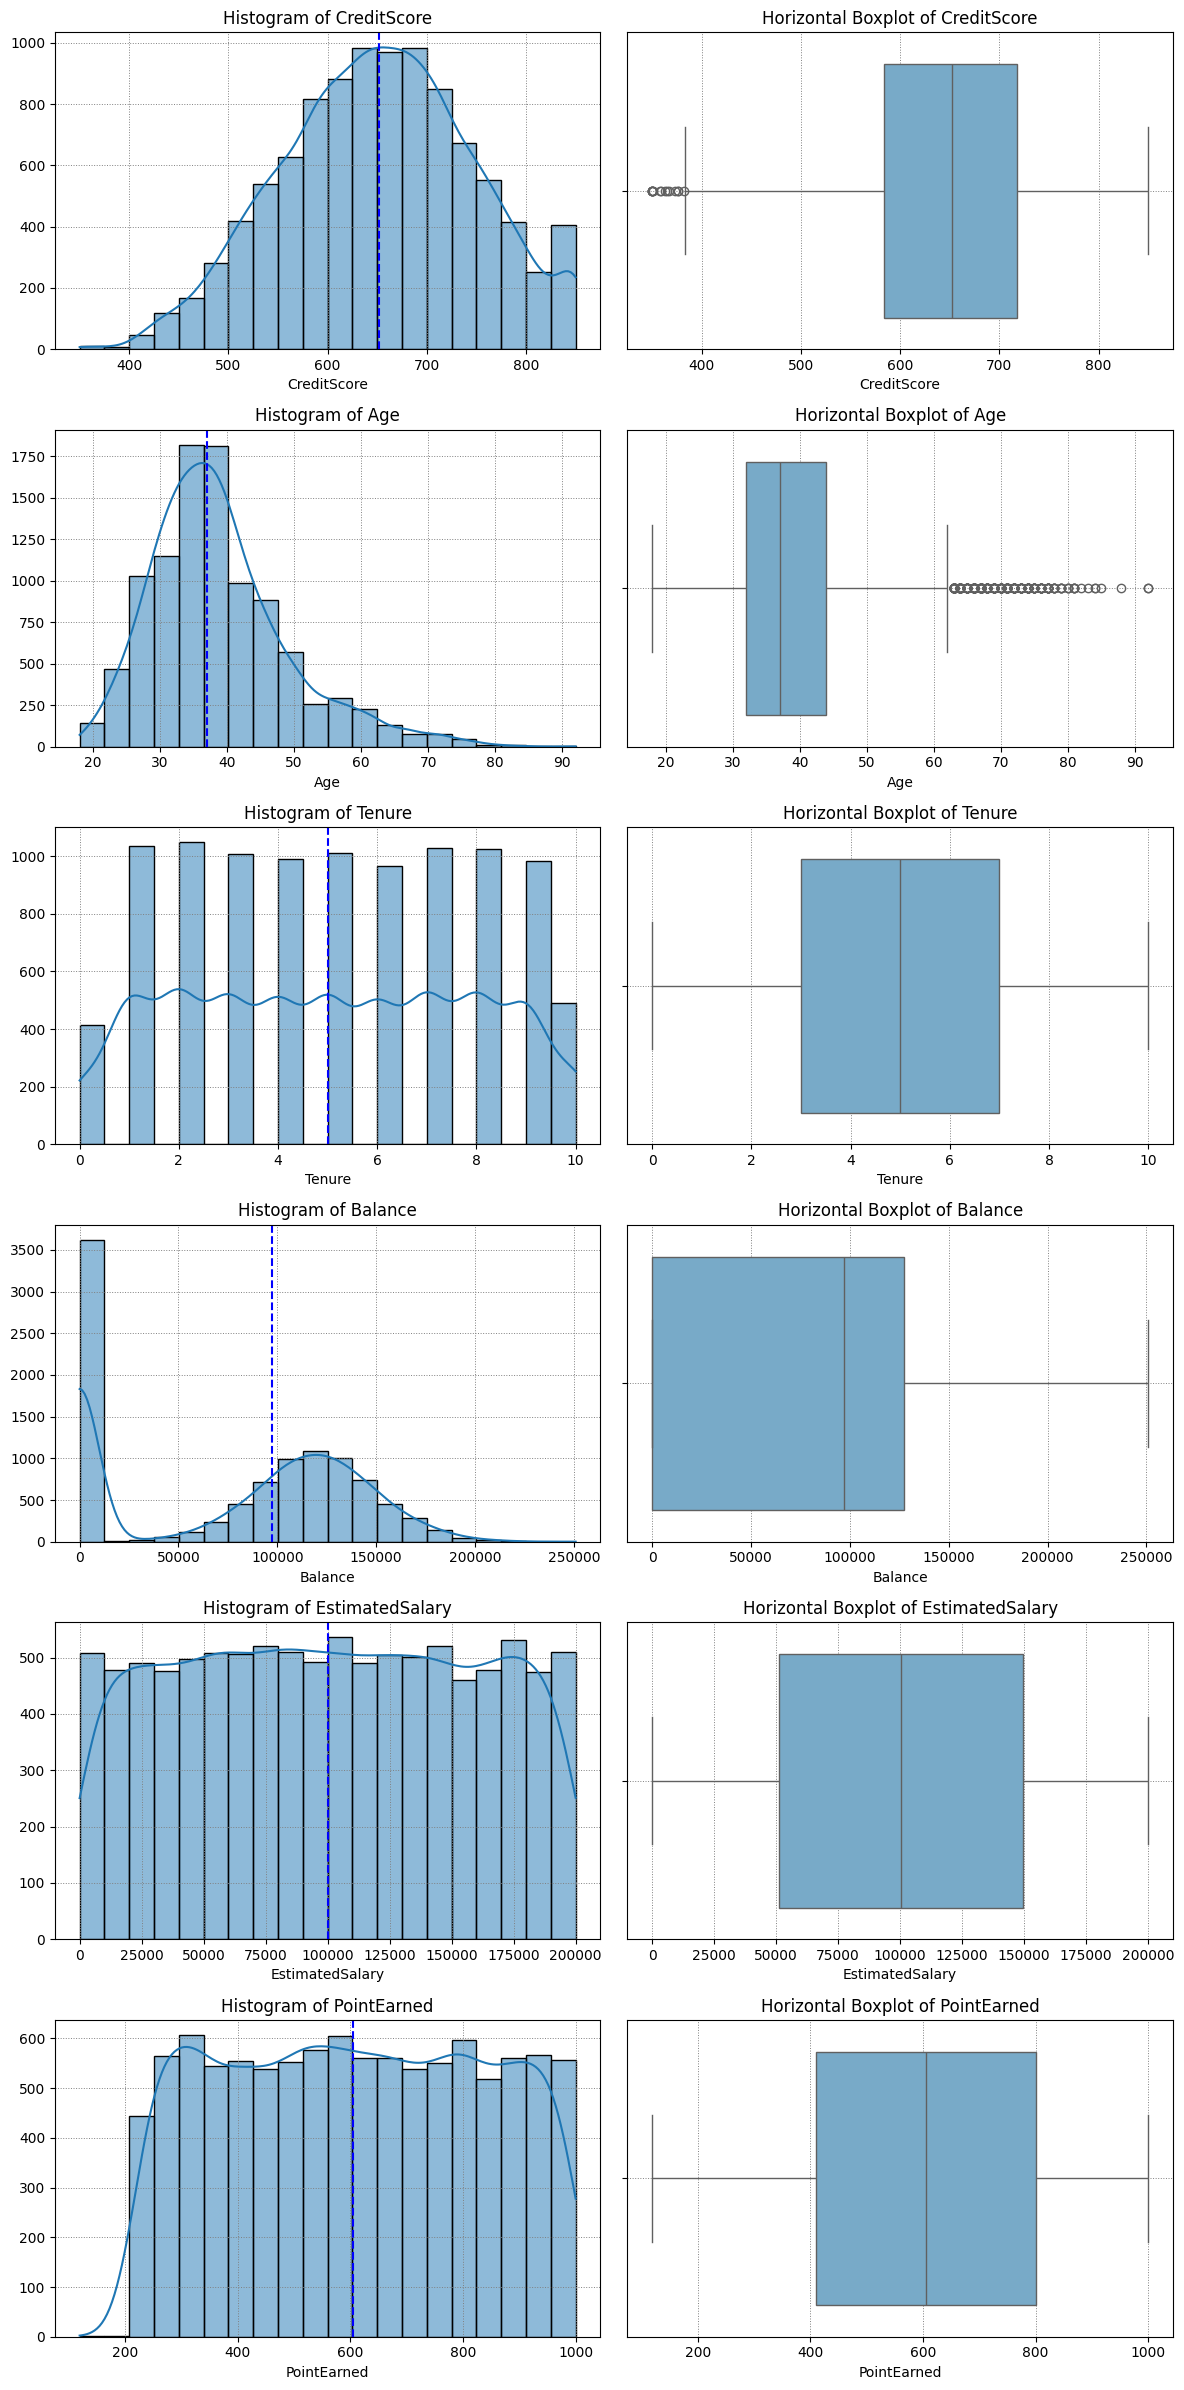

In [348]:
def plot_numerical_features(df=df_customer_churn, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], palette="Blues", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], palette="Blues", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Boxplot of {feature}")
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [349]:
def check_skewness(data = df_customer_churn, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Age                            |  +1.011320 | Highly skewed
Balance                        |  -0.141109 | Approximately symmetric
CreditScore                    |  -0.071607 | Approximately symmetric
Tenure                         |  +0.010991 | Approximately symmetric
PointEarned                    |  +0.008344 | Approximately symmetric
EstimatedSalary                |  +0.002085 | Approximately symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Boxplots** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for numerical features (Balance, CreditScore, Tenure, PointEarned and EstimatedSalary) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric** which means:
  - There is no need for transformations like log or Box-Cox or Yeo-Johnson to normalize these features.
  - Most machine learning algorithms will be able to handle these features without bias due to skewed distributions.

- The features: `Age` has **skewness values** greater than 0.5, indicating that the distributions are **Highly symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

### Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

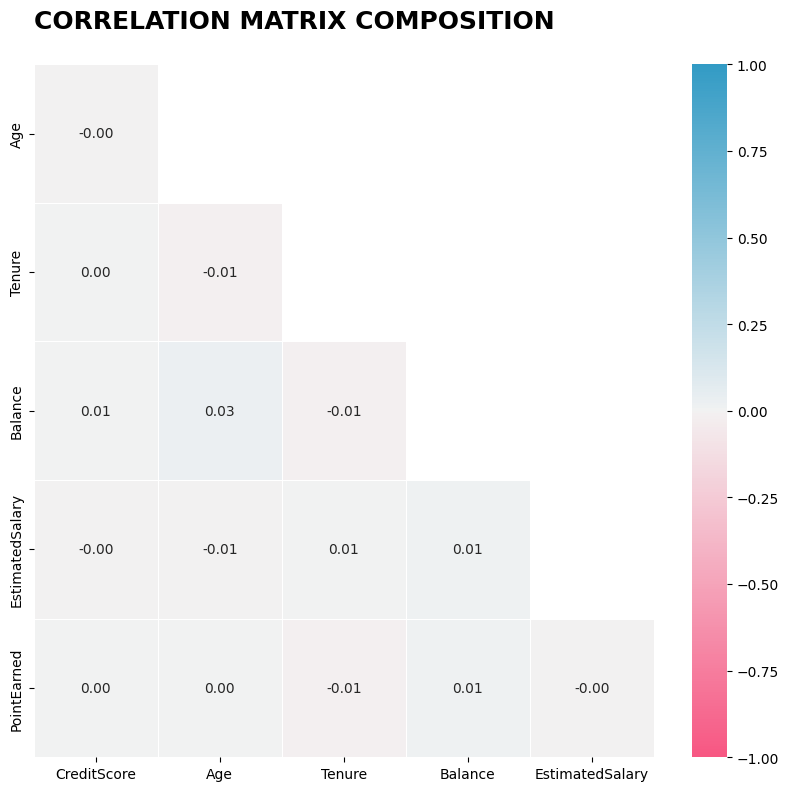

In [350]:
corr_matrix = df_customer_churn.drop(columns="Exited", axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = 'CORRELATION MATRIX COMPOSITION\n'
ax.set_title(title, loc='left', fontsize=18, weight="bold");

#### Insights from Correlation Analysis of Numerical Features

**Overall Weak Correlations:** Most correlation coefficients are extremely close to zero, indicating very weak or no linear relationship between the numerical features.

**Implications for Modeling**

- The near-zero correlations imply that each numerical feature provides **unique, non-redundant information**.
- Since multicollinearity is not an issue, these features can be safely used together in models like linear regression or tree-based methods.

## Categorical Feature Distributions

In [351]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(feature, df = df_customer_churn, order = None, labels_text = None):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))

    sns.countplot(data=df, y = feature, ax=ax[0],
                  palette=color(n_colors=len(df[feature].unique())), order=order)
    ax[0].set_title(f"Count plot of {feature}", fontsize=14, pad=25, weight = "bold")
    ax[0].set_ylabel(feature)
    ax[0].set_xlabel("")
    if feature in ["Complain", "HasCrCard", "IsActiveMember"]:
        ax[0].set_yticks(['0', '1'])
        ax[0].set_yticklabels(labels_text, weight = "bold")
    # ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
    sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

    for p in ax[0].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax[0].text(width + max(df[feature].value_counts())*0.01, y,
                f"{int(width)}", 
                ha="left", va="center", fontsize=10, fontweight="bold", color="black")

    feature_counts = df[feature].value_counts().sort_index()
    labels = []
    if feature in ["Complain", "HasCrCard", "IsActiveMember"]:
        labels=labels_text
    else:
        labels=feature_counts.index

    wedges, texts, autotexts = ax[1].pie(
        feature_counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=len(df[feature].unique())),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    ax[1].add_artist(centre_circle)
    ax[1].set_title(f"Percentage Distribution of {feature}", pad=25, weight = "bold")
    ax[1].axis("equal")

    plt.tight_layout()
    plt.show()

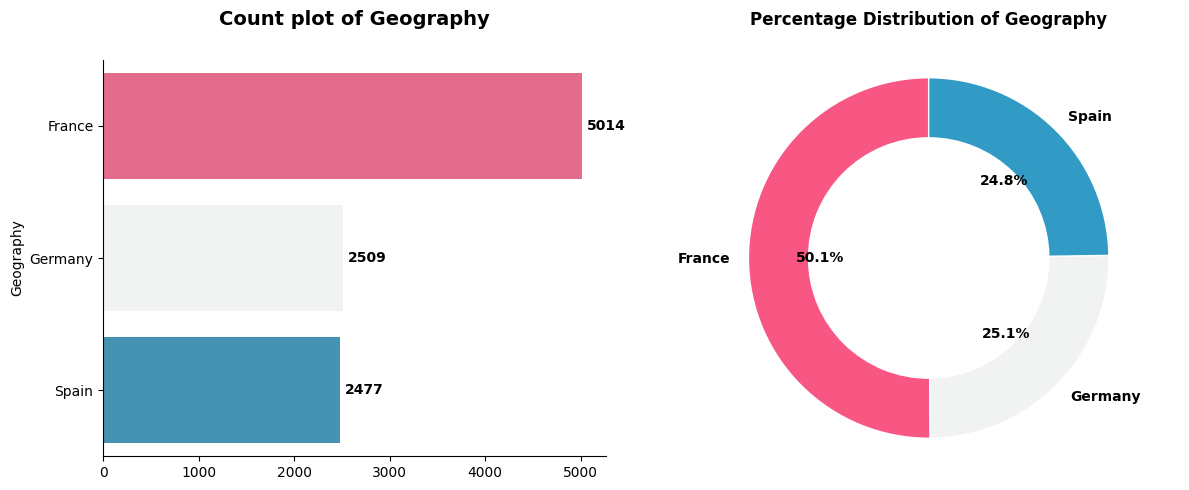

In [352]:
plot_categorical_distribution(feature="Geography")

**Geography**: <br>
* 3 countries; mostly **France** (\~50%) ⇒ Both the bar plot and donut chart clearly indicate that **France** is the dominant market
* **Germany**: 2,509 customers (≈ 25.1%) and **Spain**: 2,477 customers (≈ 24.8%) -> Combined, these two countries make up the remaining ~50% of the customer base.

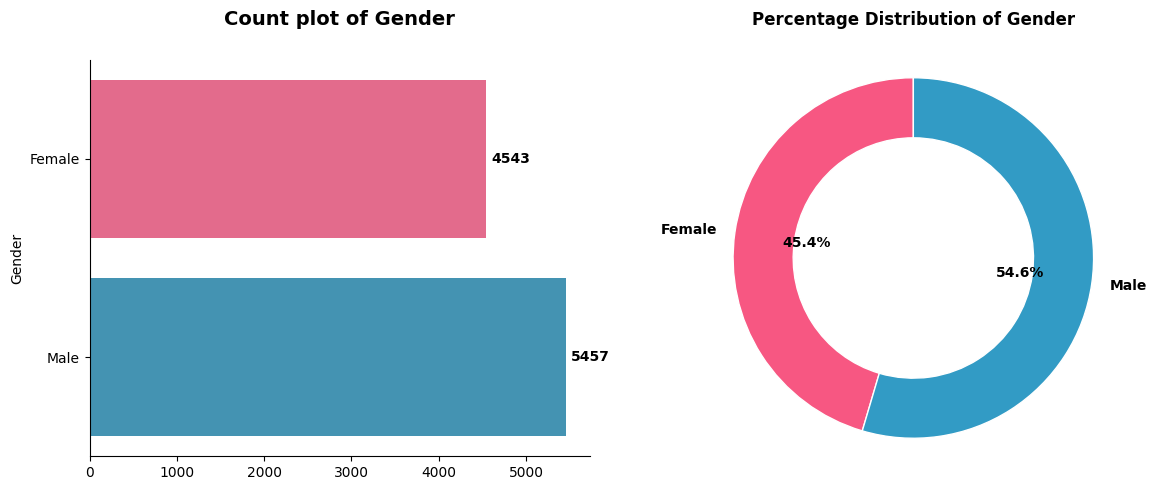

In [353]:
plot_categorical_distribution(feature="Gender")

**Gender** <br>
- There is a slight gender imbalance in the dataset, with male customers forming the majority group.

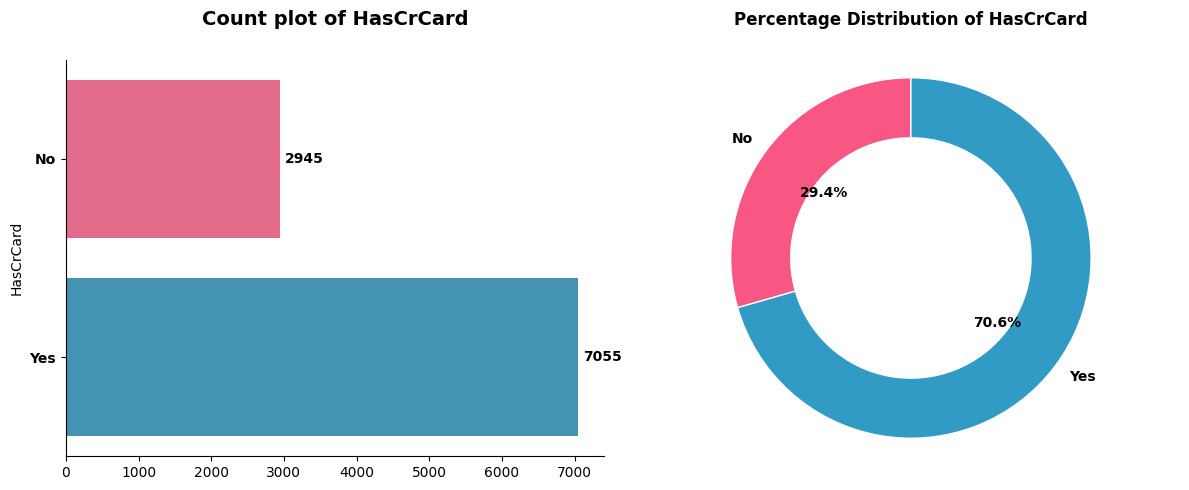

In [354]:
plot_categorical_distribution(feature="HasCrCard", labels_text=["No", "Yes"])

**HasCrCard**:
- The group with credit cards represents the majority, nearly 2.4 times larger than the group without cards.

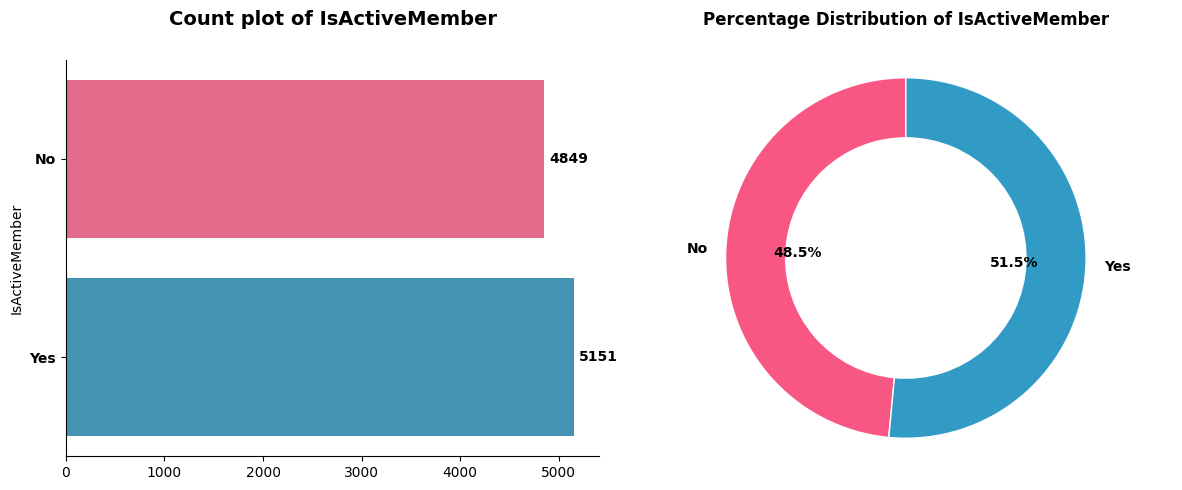

In [355]:
plot_categorical_distribution(feature="IsActiveMember", labels_text=["No", "Yes"])

**IsActiveMember**
- This near-equal ratio indicates no significant bias. Such balanced distribution is useful in statistical analysis.

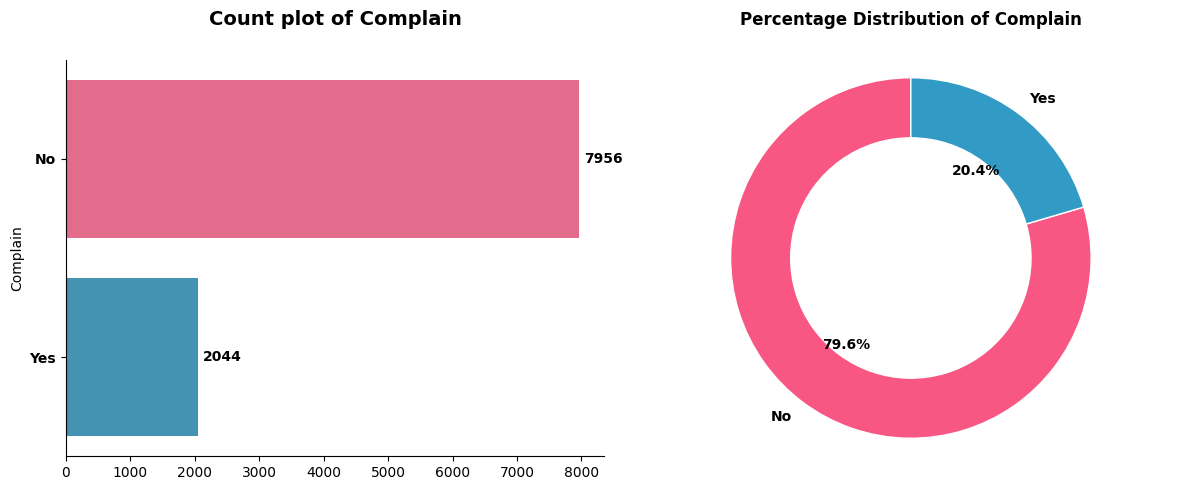

In [356]:
plot_categorical_distribution(feature="Complain", labels_text=["No", "Yes"])

**Complain**
- The Group 0 complained nearly 4 times more than Group 1.

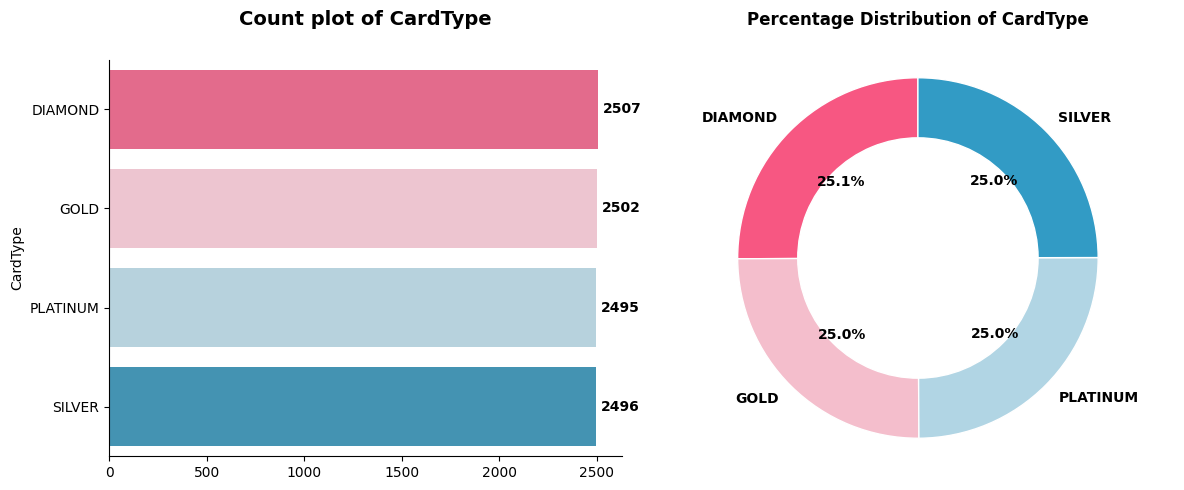

In [357]:
plot_categorical_distribution(feature="CardType")

**CardType**
- The four card types DIAMOND, GOLD, PLATINUM, SILVER each account for around 25% of the data.
- However, DIAMOND stands out slightly with 25.1%, just a bit higher than the others (each at 25.0%).

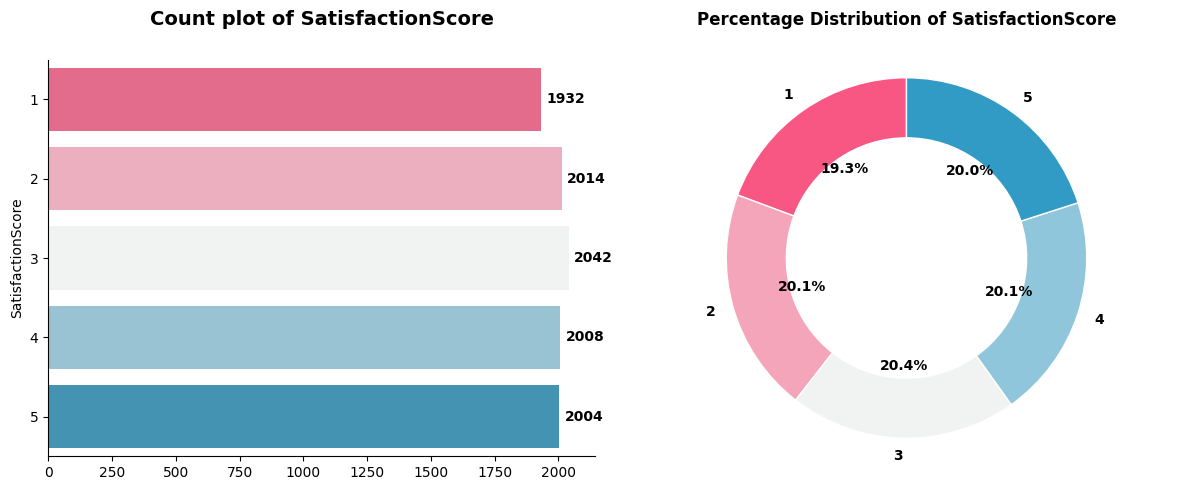

In [358]:
plot_categorical_distribution(feature="SatisfactionScore")

**SatisfactionScore**
- Each score from 1 to 5 makes up roughly 20% of the dataset.
- Score 3 stands out slightly with 20.4%, but the difference is minimal and doesn’t impact overall balance.

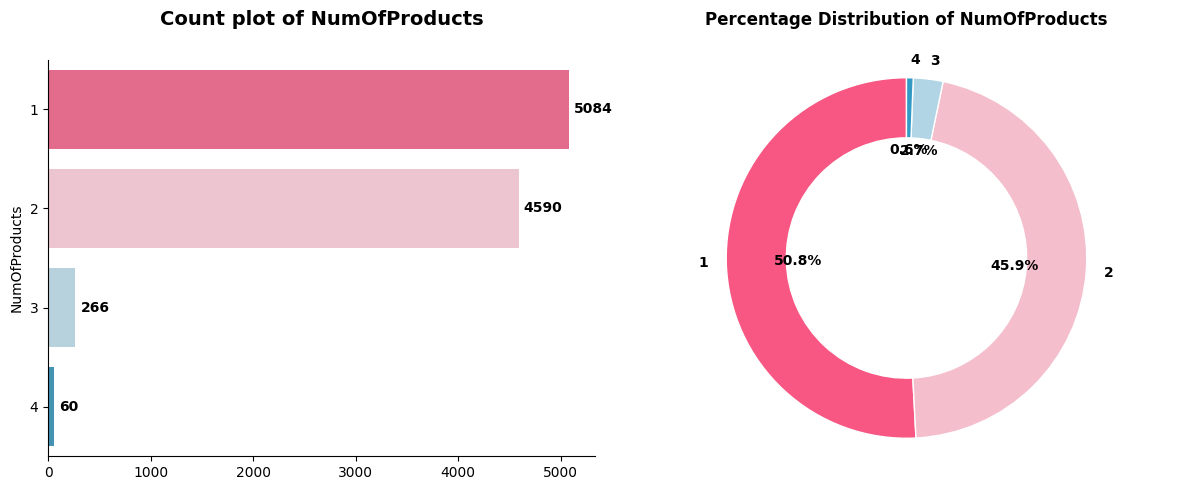

In [359]:
plot_categorical_distribution(feature="NumOfProducts")

**NumOfProducts** <br>
- The `NumOfProducts` distribution reveals that most customers are using only 1 or 2 services, suggesting relatively low engagement. Encouraging cross-selling or enhancing the experience for these users may help improve retention and reduce churn.

## Bivariate Analysis

In [360]:
def geography_distribution(df = df_customer_churn):
    import geopandas as gpd

    highlight_countries = df["Geography"].value_counts(normalize=True).to_dict()

    # Read data from "custom.geo.json"
    world = gpd.read_file("custom.geo.json")
    world["churn"] = world["admin"].map(highlight_countries)
    fig, ax = plt.subplots(figsize=(10, 8))
    world.plot(
        ax=ax,
        color="#D3D3D3",
        edgecolor="black",
        linewidth=0.3
    )

    highlighted = world[world["churn"].notnull()]
    highlighted.plot(ax=ax, column="churn", cmap="Reds", edgecolor="black", linewidth=0.8, legend=True)

    for idx, row in highlighted.iterrows():
        point = row['geometry'].representative_point()
        plt.annotate(
            text=f"{row['admin']} ({row['churn']*100:.1f}%)",
            xy=(point.x, point.y),
            ha='center',
            fontsize=10,
            color='black',
            weight='bold'
        )

    ax.set_xlim(-10, 30)
    ax.set_ylim(35, 65)

    ax.axis("off")
    ax.set_title("Churn Rate by Geography", fontsize=18, pad=20)

    plt.tight_layout()
    plt.show()

In [361]:
from IPython.core.display import HTML
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Exited</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Exited
    grouped = df.groupby([cat, "Exited"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Exited by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Exited Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 0)
    ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Exited", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Exited by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Exited", bbox_to_anchor=(1.05, 1), loc="upper left")
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Exited", df=df, show_residuals=True)

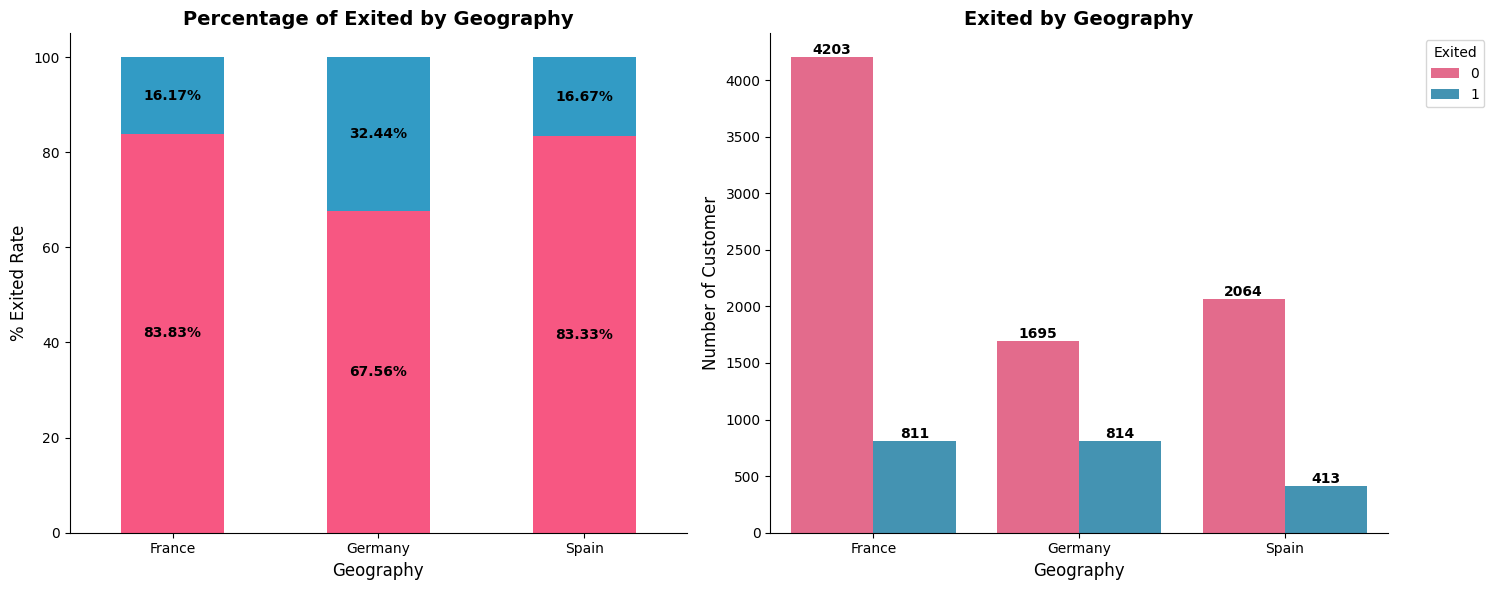


🔍 Chi-Square Test of Independence: 'Geography' vs. 'Exited'
Chi-squared statistic: 300.626
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Geography' and 'Exited'.

📈 Standardized Residuals:
Exited        0      1
Geography             
France     3.34  -6.60
Germany   -6.77  13.38
Spain      2.07  -4.09


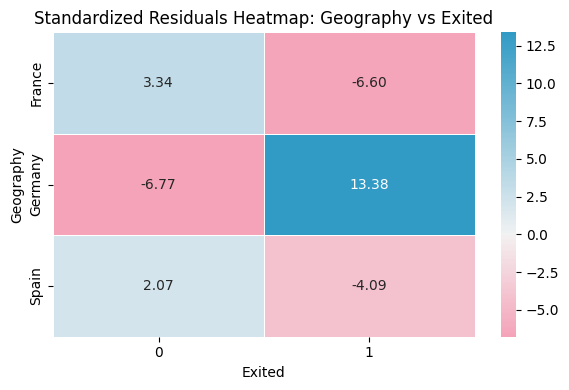

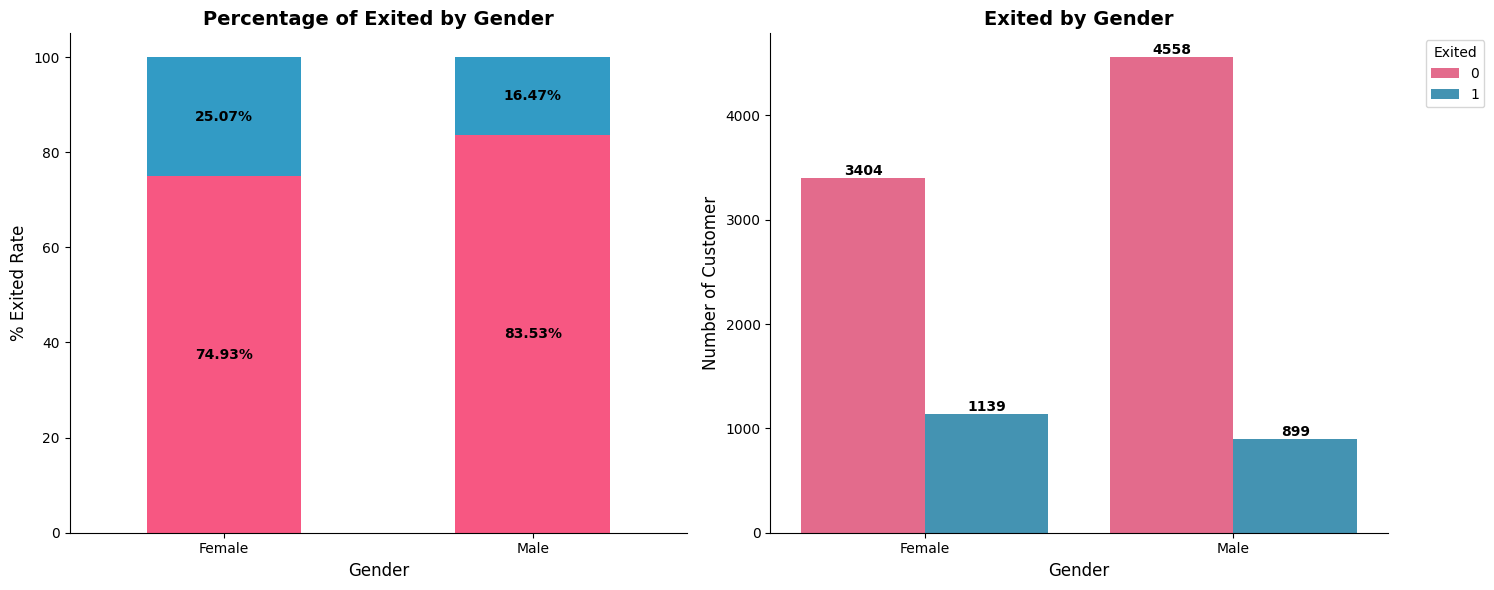


🔍 Chi-Square Test of Independence: 'Gender' vs. 'Exited'
Chi-squared statistic: 112.397
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Exited'.

📈 Standardized Residuals:
Exited     0     1
Gender            
Female -3.54  7.00
Male    3.23 -6.39


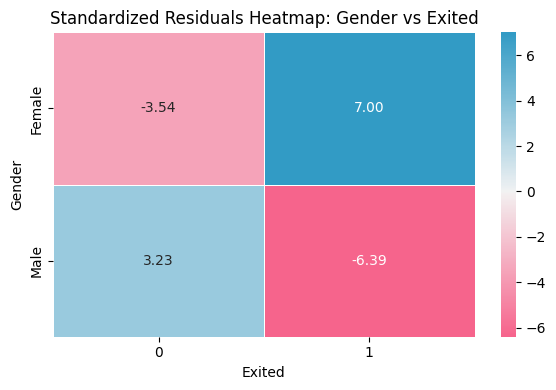

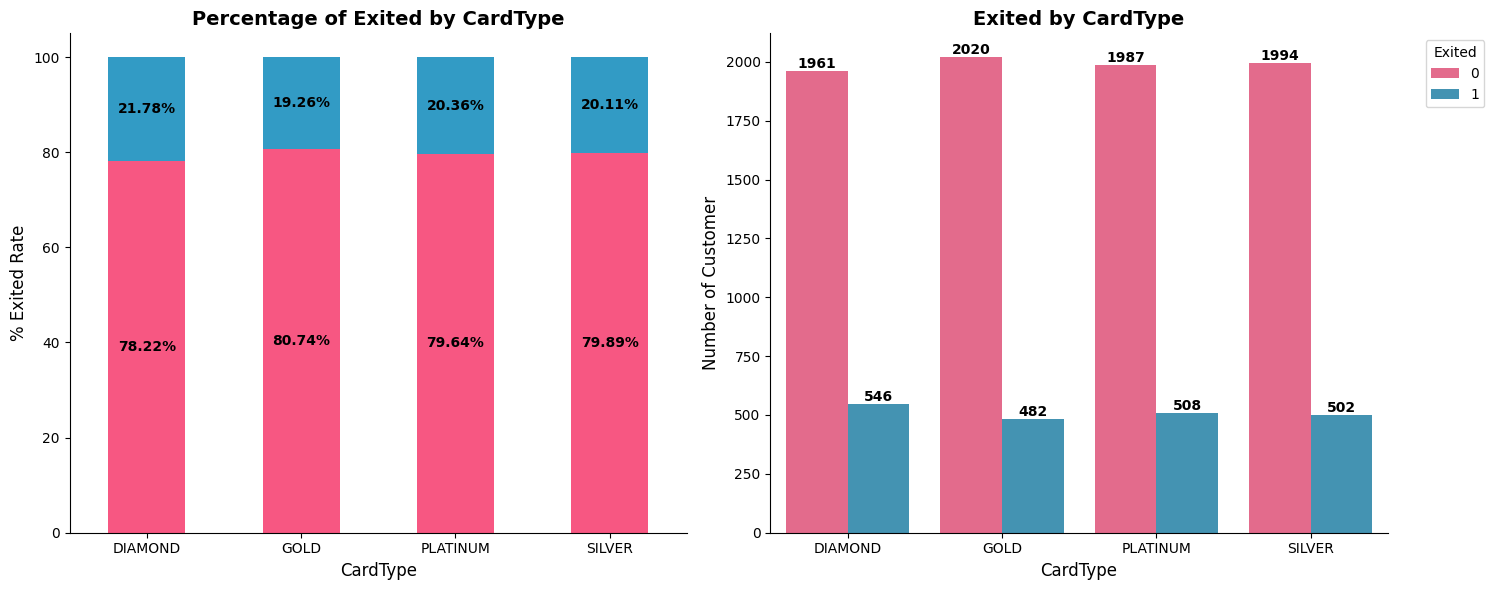


🔍 Chi-Square Test of Independence: 'CardType' vs. 'Exited'
Chi-squared statistic: 5.053
Degrees of freedom: 3
p-value: 0.167941
❎ Result: p-value ≥ 0.05 → Fail to reject H₀
→ No statistically significant association between 'CardType' and 'Exited'.

📈 Standardized Residuals:
Exited       0     1
CardType            
DIAMOND  -0.79  1.55
GOLD      0.63 -1.24
PLATINUM  0.01 -0.02
SILVER    0.15 -0.30


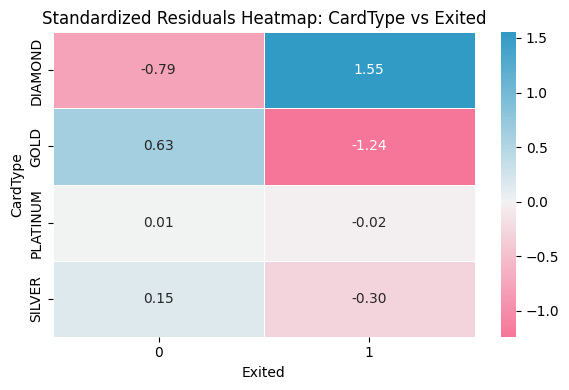

In [362]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_customer_churn)

### Insight for Categorical Features by Attrition

`Geography` <br>
- The Chi-Square test reveals a **strong and statistically significant relationship** between customers’ geographical location and their likelihood of leaving the bank.  
- Customers from **Germany show a noticeably higher tendency to leave**, as indicated by a large positive standardized residual (13.38).  
- In contrast, customers from **France and Spain tend to stay more than expected**, especially in France, which shows a large negative residual (-6.60).  
- Therefore, **“Geography” is a highly influential categorical variable** in churn analysis and should be carefully considered in customer retention strategies.

`Gender` <br>
* **Gender is a significant factor influencing customer churn behavior**.
* **Female customers exhibit a higher churn rate** compared to male customers.

This is a clear signal for the business to take action — companies should consider **designing customer retention strategies tailored by gender**, especially focusing on enhancing the satisfaction and engagement of female customers.

`HasCrCard` <br>
Although there appears to be a slight difference in exit rates between customers who have a credit card and those who don't (20.20% vs. 20.81%), the **Chi-square test** shows that this difference is **not statistically significant** (p-value = 0.5026 > 0.05). This means:

* **There is no significant association between having a credit card and customer churn**.
* The **standardized residuals** are all close to zero (within ±1), confirming that no cell significantly deviates from expected values.

Having a credit card does **not impact** whether a customer is more or less likely to leave. Therefore, marketing or retention strategies should **not focus on credit card ownership** as a key factor for predicting churn.

`IsActiveMember` <br>
- The chart indicates a **strong association** between customer activity status and their likelihood of leaving the bank.
- **Inactive customers tend to leave more frequently**, while active ones are more likely to stay.
- This suggests that **"IsActiveMember" is a key factor influencing churn** and should be considered in customer retention strategies.

`Complain` <br>
- There is a **strong and statistically significant relationship** between customers who have complained and their likelihood of leaving the bank.  
- Customers who have lodged complaints tend to **leave at a much higher rate** compared to those who haven't.  
- This indicates that the **“Complain” variable is a crucial factor** to consider in customer retention strategies.

`CardType` <br>
- There is **no statistically significant relationship** between the type of card a customer uses and their decision to leave the bank.  
- This suggests that the **“CardType” variable does not play a major role** in influencing customer churn.  
- In customer retention analysis, this factor **should not be prioritized** over others such as activity level or complaint history.

`SatisfactionScore` <br>
- The value **1.41** for **SatisfactionScore = 2 and Exited = 1** represents a **standardized residual**.  
- It indicates that customers with a satisfaction score of **2** tend to leave **more than expected**, but…  
- For a result to be **statistically significant**, the residual must be **greater than 2** (or less than -2).  
- Therefore, while **1.41 suggests a possible trend**, it’s **not strong enough to conclude a statistically significant difference**.

`NumOfProducts` <br>
- There is a **strong and statistically significant relationship** between the number of products a customer uses and their likelihood of leaving the bank.  
- Certain product groups, such as customers using **1, 3, or 4 products**, exhibit **higher-than-expected churn**, based on standardized residuals.  
- The **“NumOfProducts” variable is a critical factor** that should be considered in churn prediction models and customer retention strategies.

In [363]:
def perform_statical_testing(feature, df = df_customer_churn, total_categories = 2, target_feature = "Exited"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Attrition(feature, df = df_customer_churn, target_feature = "Exited", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Exited</b></h2>"))
    # Summary information
    df_summary_feature = df.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df[feature].mean():.2f}"),
        ("Overall Median", f"{df[feature].median()}"),
        ("Overall Std", f"{df[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.violinplot(x=target_feature, y=feature, data=df, hue=target_feature,
                   palette=color(n_colors=len(df[target_feature].unique())), ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

,Exited,Count,Mean,Median,Std
0,0,7962,651.837855,653.000000,95.650047
1,1,2038,645.414622,646.000000,100.337351


🔎 D’Agostino and Pearson Normality Test for 'CreditScore' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 15.286
  p-value   : 0.00048
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 142.316
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CreditScore' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7846429.5
p-value     : 0.02175071120128018

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'CreditScore' than Group '1'.


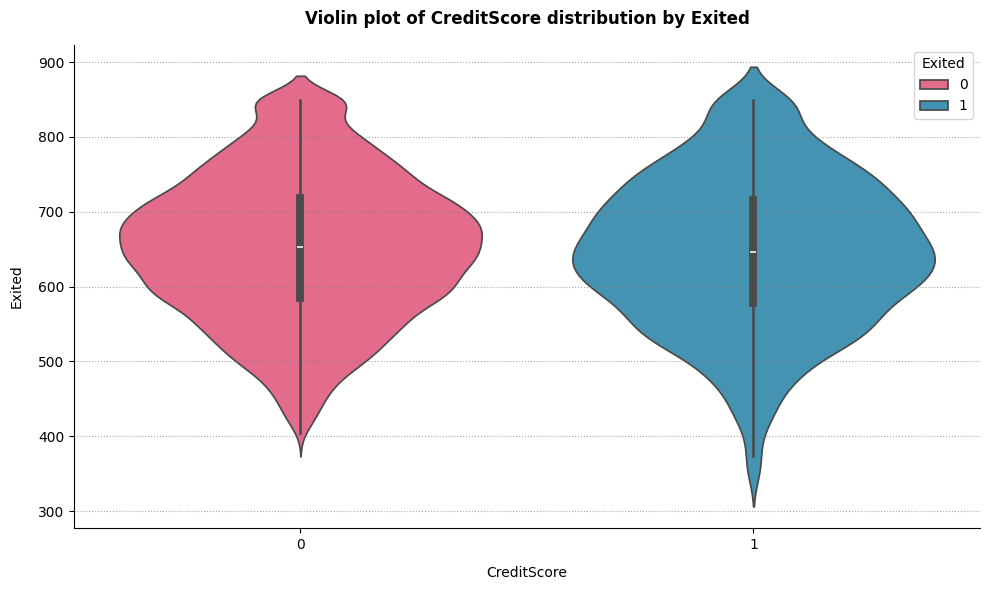

,Exited,Count,Mean,Median,Std
1,1,2038,44.835623,45.000000,9.759754
0,0,7962,37.408063,36.000000,10.125957


🔎 D’Agostino and Pearson Normality Test for 'Age' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 3.423
  p-value   : 0.18055
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 2023.669
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 11878815.0
p-value     : 2.7802649610221583e-230

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Age' than Group '0'.


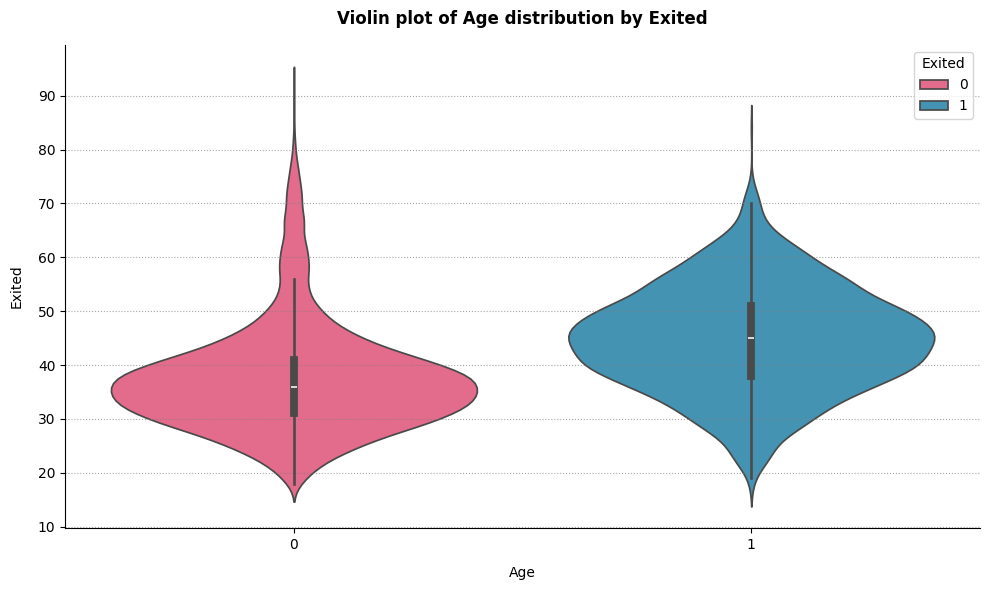

,Exited,Count,Mean,Median,Std
0,0,7962,5.032781,5.000000,2.880496
1,1,2038,4.934740,5.000000,2.936768


🔎 D’Agostino and Pearson Normality Test for 'Tenure' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1379.974
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 4977.939
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Tenure' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7955556.0
p-value     : 0.1729583374544681

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


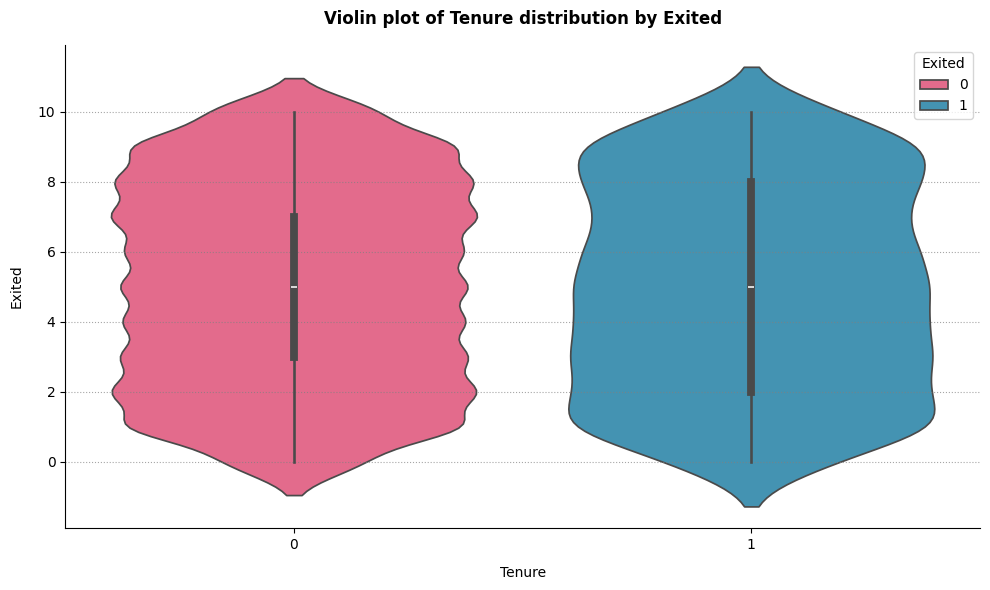

,Exited,Count,Mean,Median,Std
1,1,2038,91109.476562,109344.230469,58346.483163
0,0,7962,72742.750000,92063.058594,62851.577085


🔎 D’Agostino and Pearson Normality Test for 'Balance' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 392.080
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 42753.072
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Balance' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9373909.5
p-value     : 1.1687654686289807e-28

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Balance' than Group '0'.


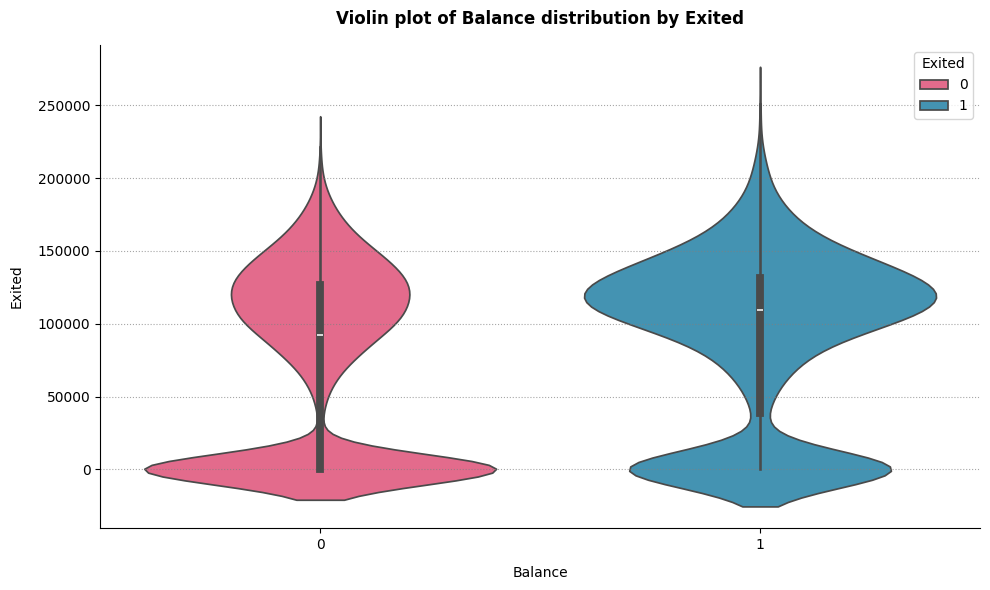

,Exited,Count,Mean,Median,Std
1,1,2038,101509.914062,102489.335938,57932.623378
0,0,7962,99726.851562,99620.355469,57399.956711


🔎 D’Agostino and Pearson Normality Test for 'EstimatedSalary' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1834.219
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 5453.509
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'EstimatedSalary' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8258306.0
p-value     : 0.21235576456250627

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


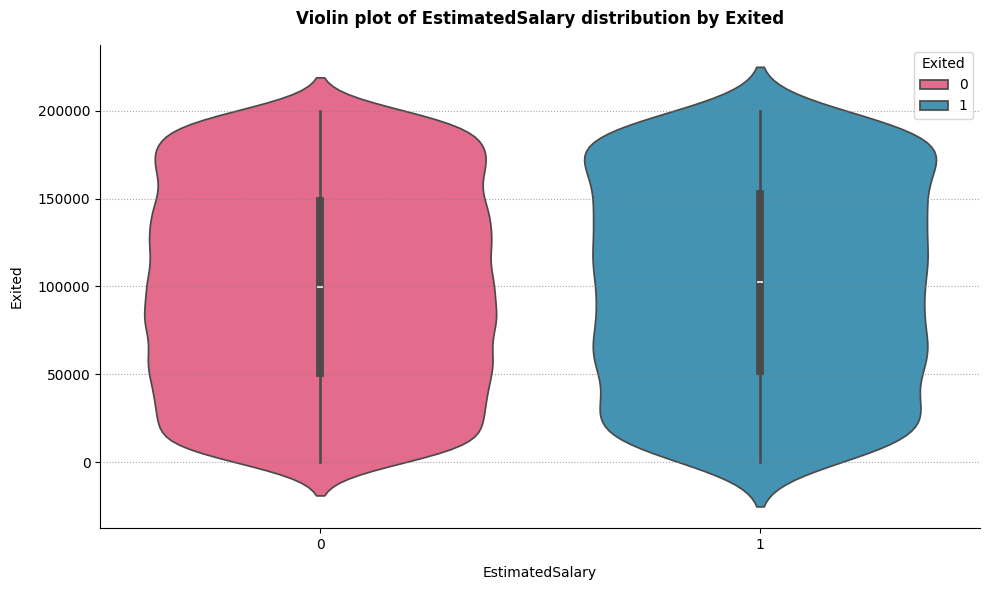

,Exited,Count,Mean,Median,Std
0,0,7962,607.044084,603.000000,226.091682
1,1,2038,604.448479,610.500000,225.315301


🔎 D’Agostino and Pearson Normality Test for 'PointEarned' across 'Exited' groups

 Group: 1 (n = 2038)
  Statistic : 1510.973
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 7962)
  Statistic : 6581.955
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'PointEarned' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8062041.5
p-value     : 0.6595122287415172

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


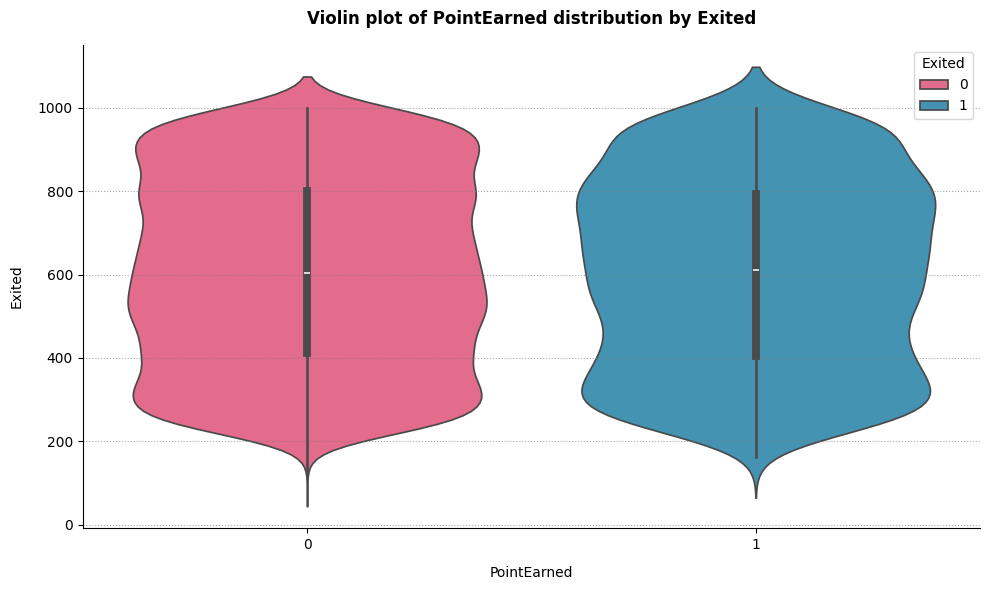

In [364]:
for feature in num_features:
    plot_numerical_distribution_by_Attrition(feature=feature)

### Insight Numerical Features by Exited

`CreditScore` <br>
* There is a statistically significant difference in credit scores between customers who churned and those who did not (p-value ≈ 0.0217 < 0.05).
* The non-churn group has a higher median credit score (653 vs. 646). <br>

-> The variable *CreditScore* appears to have some influence on churn behavior; however, the impact is relatively minor due to the small difference observed.

`Age` <br>
- There is a statistically significant difference in age between churned and retained customers.
- The median age of churned customers is higher (45 vs. 36), suggesting older individuals are more likely to leave. <br>

-> This suggests that age is a significant predictor of customer churn, with older customers being more likely to exit.

`Tenure` <br>
- The Mann-Whitney U test indicates no statistically significant difference in tenure between customers who left and those who stayed.
- With a p-value of 0.17 > 0.05, we fail to reject the null hypothesis, meaning the distribution of tenure is similar across both groups.

`Balance` <br>
- The test results show a statistically significant difference in account balance between customers who stayed and those who exited.
- Customers who exited have a higher median balance (109,344 vs. 92,063)

-> This suggests that Balance is a significant predictor of customer churn, with higher balance being more likely to exit.

`PointEarned` and  `EstimatedSalary`<br>
- The Mann-Whitney U test indicates no statistically significant difference in tenure between customers who left and those who stayed.
- With a p-value > 0.05, we fail to reject the null hypothesis, meaning the distribution of PointEarned and EstimatedSalary are similar across both groups.

| Feature            | Type        | Statistical Test Used | Relationship with Exited | Summary                                                                  |
| ------------------ | ----------- | --------------------- | ------------------------ | ------------------------------------------------------------------------ |
| **Geography**      | Categorical | Chi-Square Test       | ✅ Significant            | Customers from **Germany** are more likely to churn, **France** less so. |
| **Gender**         | Categorical | Chi-Square Test       | ✅ Significant            | **Female** customers have a slightly higher churn rate than males.       |
| **IsActiveMember** | Categorical | Chi-Square Test       | ✅ Significant            | **Inactive** customers are more likely to churn.                         |
| **Complain**       | Categorical | Chi-Square Test       | ✅ Significant            | Customers who have **complained** are more likely to churn.              |
| **NumOfProducts**  | Categorical | Chi-Square Test       | ✅ Significant            | Customers with **1, 3, 4 products** tend to churn less.                |
| **CreditScore**    | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Non-churned customers have slightly **higher median credit scores**.     |
| **Age**            | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Churned customers tend to be **older on median**.                       |
| **Balance**        | Numerical   | Mann–Whitney U Test   | ✅ Significant            | Churned customers have a **notably higher median balance**.              |


## Multivariate Analysis

### Why does Germany have the highest churn rate?
#### Poor experience

In [365]:
df_customer_churn["Complain"] = df_customer_churn["Complain"].astype(int)

# % complain by Geography
complain_summary = df_customer_churn.groupby("Geography")["Complain"].mean().reset_index()
complain_summary.columns = ["Geography", "ComplainRate_All"]
print(complain_summary)

# % complain churned
churn_complain = df_customer_churn[df_customer_churn["Exited"] == 1].groupby("Geography")["Complain"].mean().reset_index()
churn_complain.columns = ["Geography", "ComplainRate_Churn"]

# % complain non-churn
non_churn_complain = df_customer_churn[df_customer_churn["Exited"] == 0].groupby("Geography")["Complain"].mean().reset_index()
non_churn_complain.columns = ["Geography", "ComplainRate_NonChurn"]

# Merge result
summary = complain_summary.merge(churn_complain, on="Geography").merge(non_churn_complain, on="Geography")
summary["ComplainRate_All"] = (summary["ComplainRate_All"] * 100).round(2)
summary["ComplainRate_Churn"] = (summary["ComplainRate_Churn"] * 100).round(2)
summary["ComplainRate_NonChurn"] = (summary["ComplainRate_NonChurn"] * 100).round(2)
print(summary)

  Geography  ComplainRate_All
0    France          0.161947
1   Germany          0.326425
2     Spain          0.166734
  Geography  ComplainRate_All  ComplainRate_Churn  ComplainRate_NonChurn
0    France             16.19               99.75                   0.07
1   Germany             32.64               99.88                   0.35
2     Spain             16.67               99.76                   0.05


***Germany stands out with a significantly higher complaint rate across the entire customer base — 32.6%, twice as high as France and Spain***

#### Balance by Geography

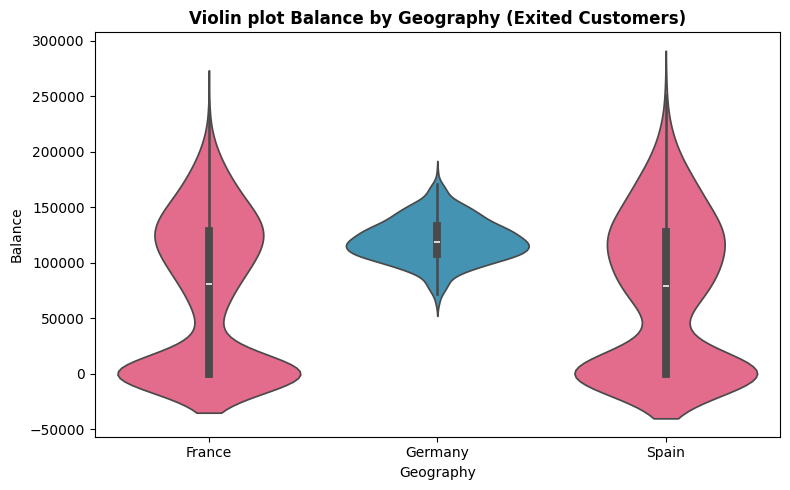

In [366]:
plt.figure(figsize=(8, 5))

ax = sns.violinplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    y = "Balance",
    palette=color(n_colors=2)
)

plt.title("Violin plot Balance by Geography (Exited Customers)", weight = "bold")
plt.ylabel("Balance")
plt.xlabel("Geography")

plt.tight_layout()
plt.show()

***Customers from Germany have a noticeably higher median account balance compared to those in France and Spain. This suggests that German customers tend to exit despite having larger account balance.***

#### CreditScore by Geography

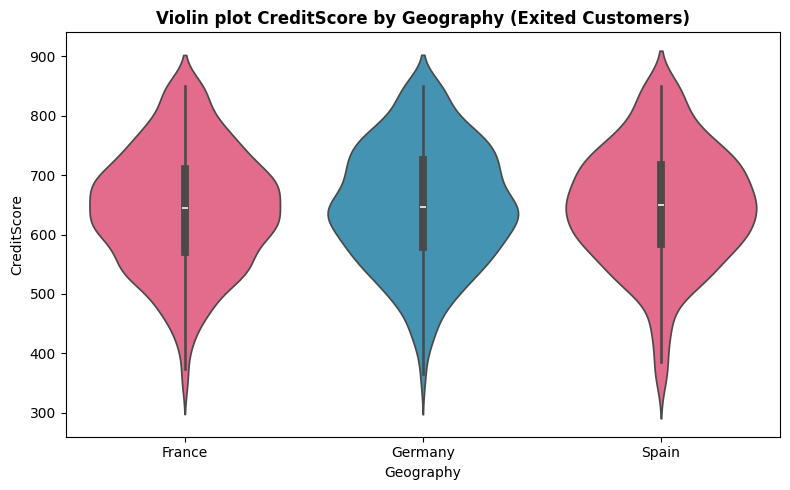

In [367]:
plt.figure(figsize=(8, 5))

ax = sns.violinplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    y = "CreditScore",
    palette=color(n_colors=2)
)

plt.title("Violin plot CreditScore by Geography (Exited Customers)", weight = "bold")
plt.ylabel("CreditScore")
plt.xlabel("Geography")

plt.tight_layout()
plt.show()

#### IsActiveMember Count by Geography

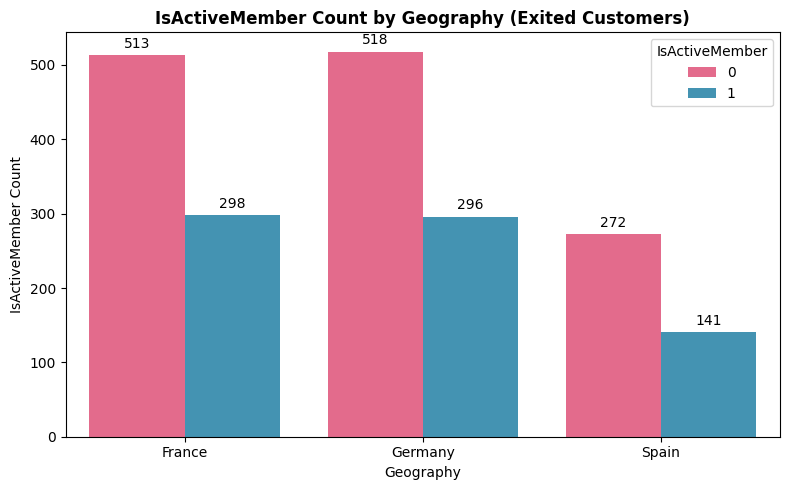

In [368]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    hue="IsActiveMember",
    palette=color(n_colors=2)
)

plt.title("IsActiveMember Count by Geography (Exited Customers)", weight = "bold")
plt.ylabel("IsActiveMember Count")
plt.xlabel("Geography")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

- In all three countries (France, Germany, Spain), the number of non-active members (IsActiveMember = 0) who exited is clearly higher than the number of active ones.
- This trend is consistent across regions, especially in Germany and France, reinforcing that “IsActiveMember” is a strong predictor of customer churn, regardless of geography.
- Customers who are less engaged with the bank (i.e., not active) are much more likely to leave, highlighting a direct link between activity level and retention.

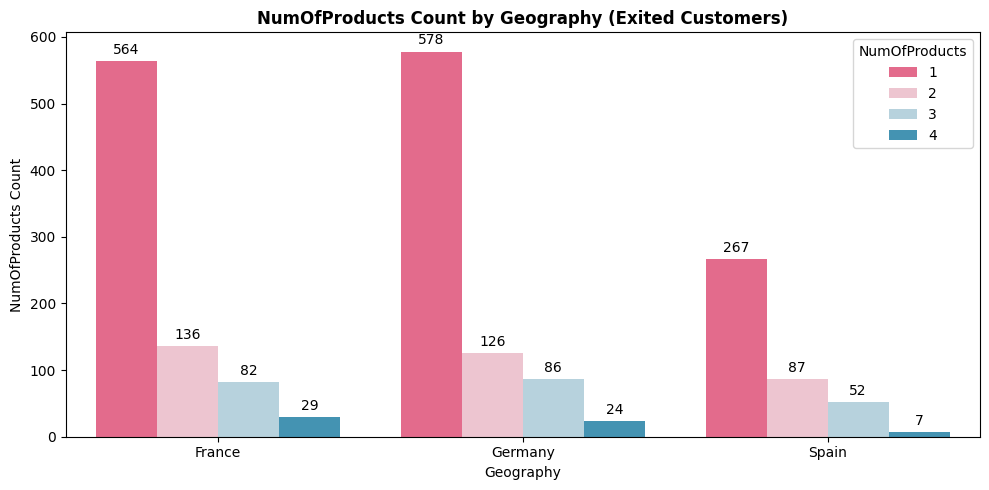

In [369]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    data=df_customer_churn[df_customer_churn["Exited"] == 1],
    x="Geography",
    hue="NumOfProducts",
    palette=color(n_colors=4)
)

plt.title("NumOfProducts Count by Geography (Exited Customers)", weight = "bold")
plt.ylabel("NumOfProducts Count")
plt.xlabel("Geography")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

- Across all three countries (France, Germany, Spain), customers with only 1 product represent the highest churn rate, indicating lower engagement levels.
- The churn rate decreases as the number of products increases. Notably, customers with 4 products are very few.
- This pattern appears consistently across regions, with only slight differences in counts.


**Insight** <br>
- There is no significant difference in **CreditScore**, **IsActiveMember**, **NumOfProducts** across countries among customers who have churned.
- ***Germany has the highest complaint rate (32.6%) and higher account balances among churned customers. These suggest dissatisfaction and high-value customer loss, which may explain the higher churn rate.***

### Why do females have a higher churn rate compared to males?

In [370]:
# Create summary table by gender
def gender_churn_summary(df):
    summary = df.groupby("Gender").agg(
        ChurnRate=("Exited", "mean"),
        Avg_Balance=("Balance", "mean"),
        Percent_Inactive=("IsActiveMember", lambda x: (x == 0).mean()),
        Avg_Age=("Age", "mean"),
        Avg_CreditScore = ("CreditScore", "mean"),
        Avg_EstimatedSalary = ("EstimatedSalary", "mean"),
        Avg_PointEarned  = ("PointEarned", "mean"),
        Percent_Complain=("Complain", lambda x: (x == 1).mean()),
        Count=("Exited", "count")
    ).reset_index()

    # Format percentages for readability
    summary["ChurnRate"] = (summary["ChurnRate"] * 100).round(2)
    summary["Percent_Inactive"] = (summary["Percent_Inactive"] * 100).round(2)
    summary["Percent_Complain"] = (summary["Percent_Complain"] * 100).round(2)
    summary["Avg_Balance"] = summary["Avg_Balance"].round(0)
    summary["Avg_CreditScore"] = summary["Avg_CreditScore"].round(0)
    summary["Avg_EstimatedSalary"] = summary["Avg_EstimatedSalary"].round(0)
    summary["Avg_PointEarned"] = summary["Avg_PointEarned"].round(0)
    summary["Avg_Age"] = summary["Avg_Age"].round(1)

    return summary

# Apply to the entire dataset
summary_all = gender_churn_summary(df_customer_churn)

# Apply to the churned customers only
summary_churn = gender_churn_summary(df_customer_churn[df_customer_churn["Exited"] == 1])

print("Gender-wise Overview (All Customers):")
print(summary_all)

print("\n Gender-wise Overview (Churned Customers Only):")
print(summary_churn)

Gender-wise Overview (All Customers):
   Gender  ChurnRate  Avg_Balance  Percent_Inactive  Avg_Age  Avg_CreditScore  \
0  Female      25.07      75659.0             49.72     39.2            651.0   
1    Male      16.47      77174.0             47.46     38.7            650.0   

   Avg_EstimatedSalary  Avg_PointEarned  Percent_Complain  Count  
0             100602.0            610.0             25.14   4543  
1              99665.0            604.0             16.53   5457  

 Gender-wise Overview (Churned Customers Only):
   Gender  ChurnRate  Avg_Balance  Percent_Inactive  Avg_Age  Avg_CreditScore  \
0  Female      100.0      89037.0             63.65     44.8            647.0   
1    Male      100.0      93736.0             64.29     44.9            644.0   

   Avg_EstimatedSalary  Avg_PointEarned  Percent_Complain  Count  
0             102949.0            613.0             99.82   1139  
1              99687.0            593.0             99.78    899  


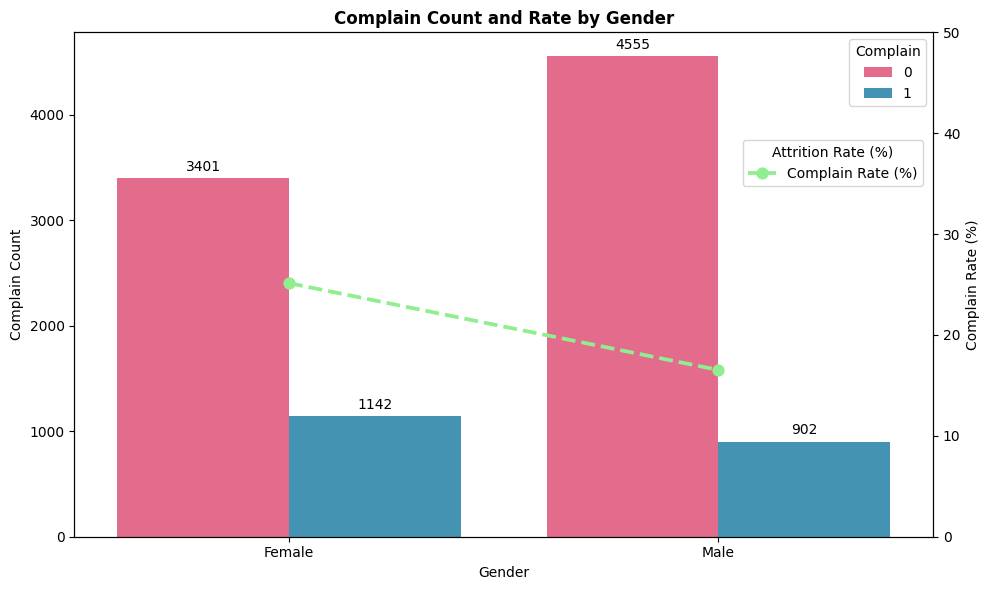

In [371]:
complain_rate = df_customer_churn.groupby("Gender")["Complain"].mean().reset_index()
complain_rate["Complain"] = complain_rate["Complain"] * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: Complain Count
sns.countplot(
    data=df_customer_churn,
    x="Gender",
    hue="Complain",
    palette=color(n_colors=2),
    ax=ax1
)

ax1.set_title("Complain Count and Rate by Gender", weight="bold")
ax1.set_ylabel("Complain Count")
ax1.set_xlabel("Gender")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", label_type="edge", padding=3)

# Complain Rate
ax2 = ax1.twinx()
sns.pointplot(
    data=complain_rate,
    x="Gender",
    y="Complain",
    color="lightgreen",
    markers="o",
    linestyles="--",
    label="Complain Rate (%)",
    ax=ax2
)

ax2.set_ylabel("Complain Rate (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.legend(title="Attrition Rate (%)", loc="upper left", bbox_to_anchor=(0.77, 0.8))
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.show()


***Females exhibit a higher churn rate, which may stem from a higher level of dissatisfaction (as indicated by a higher complaint rate), despite their relatively active engagement (higher PointEarned). This suggests that the issue lies in customer experience or service quality not meeting their expectations, rather than financial factors such as income or credit score.***

In [372]:
# Convert them to int8
category_cols = ["HasCrCard", "IsActiveMember", "Complain", "SatisfactionScore", "NumOfProducts"]
df_customer_churn[category_cols] = df_customer_churn[category_cols].astype("int8")
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int16   
 1   Geography          10000 non-null  category
 2   Gender             10000 non-null  category
 3   Age                10000 non-null  int8    
 4   Tenure             10000 non-null  int8    
 5   Balance            10000 non-null  float32 
 6   NumOfProducts      10000 non-null  int8    
 7   HasCrCard          10000 non-null  int8    
 8   IsActiveMember     10000 non-null  int8    
 9   EstimatedSalary    10000 non-null  float32 
 10  Exited             10000 non-null  int8    
 11  Complain           10000 non-null  int8    
 12  SatisfactionScore  10000 non-null  int8    
 13  CardType           10000 non-null  category
 14  PointEarned        10000 non-null  int16   
dtypes: category(3), float32(2), int16(2), int8(8)
memory u

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>

### Handling Skewness

In [373]:
skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Age                            |  +1.011320 | Highly skewed
Balance                        |  -0.141109 | Approximately symmetric
CreditScore                    |  -0.071607 | Approximately symmetric
Tenure                         |  +0.010991 | Approximately symmetric
PointEarned                    |  +0.008344 | Approximately symmetric
EstimatedSalary                |  +0.002085 | Approximately symmetric
----------------------------------------------------------------------


In [374]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None    
):
    """
    Handle skewed numerical features by applying appropriate transformations.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []

    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [375]:
processed_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_customer_churn, 
                                                                                           num_features=skew_feature)

In [376]:
list_feature_skewed = processed_df.select_dtypes(include=["number"]).columns.tolist()
for feature in ["Exited", "HasCrCard", "IsActiveMember", "Complain", "SatisfactionScore", "NumOfProducts"]:
    list_feature_skewed.remove(feature)
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=list_feature_skewed)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
Balance                        |  -0.141109 | Approximately symmetric
CreditScore                    |  -0.071607 | Approximately symmetric
Tenure                         |  +0.010991 | Approximately symmetric
PointEarned                    |  +0.008344 | Approximately symmetric
PT_Age                         |  -0.002495 | Approximately symmetric
EstimatedSalary                |  +0.002085 | Approximately symmetric
----------------------------------------------------------------------


**Insight** <br>
**Observations from the Skewness Table (`processed_df`):**

✅ **Approximately Symmetric**: <br>
Several features, such as: <br>
  * `PT_Age` show skewness close to `0`.
  * This indicates that **Yeo-Johnson transformation was effective** for this variable.

### Create Test Set

🔴 Suppose you chatted with experts who told you that the **CreditScore** is a very important attribute to predict **Exited**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of score in the whole dataset. Since the CreditScore is a continuous numerical attribute, we first need to create an score category attribute.

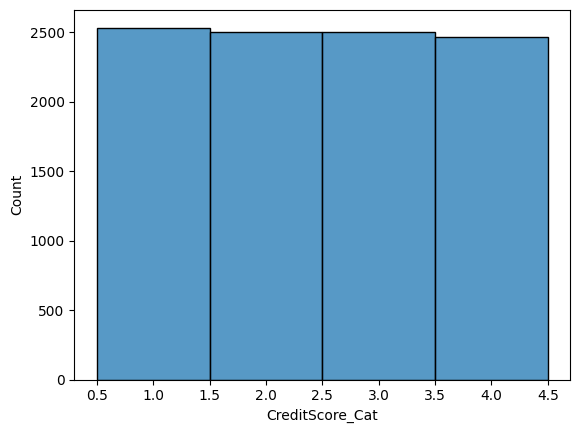

In [377]:
processed_df["CreditScore_Cat"] = pd.qcut(processed_df["CreditScore"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["CreditScore_Cat"]);

In [378]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["CreditScore_Cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

In [379]:
# Now we should remove the CreditScore_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("CreditScore_Cat", axis=1, inplace=True)

### Scale

In [380]:
df_Churn_new = start_train_set.drop("Exited", axis=1)
df_Churn_label = start_train_set["Exited"].copy()

In [381]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

cat_ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [382]:
list_feature_num_robust = ["CreditScore", "PT_Age"]
list_feature_num_stand = ["Tenure", "Balance", "EstimatedSalary", "PointEarned"]
list_feature_cat_onehot= ["Gender", "Geography", "CardType"]
list_feature_cat_keep= ["HasCrCard", "IsActiveMember", "Complain"]
list_feature_cat_ordinal= ["SatisfactionScore", "NumOfProducts"]

In [383]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_ordinal", cat_ordinal_transformer, list_feature_cat_ordinal),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_Churn_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['CreditScore', 'PT_Age']),
                                ('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Tenure', 'Balance', 'EstimatedSalary',
                                  'PointEarned']),
                                ('cat_onehot',
                                 Pipeline(steps...
                                 ['Gender', 'Geography', 'CardType']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['SatisfactionScore', 'NumOfProducts']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HasCrCard', 'IsActiveMember', 'Complain'])])

In [384]:
df_Churn_prepared = preprocessor.transform(df_Churn_new)

In [385]:
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__CreditScore',
 'num_robust__PT_Age',
 'num_standard__Tenure',
 'num_standard__Balance',
 'num_standard__EstimatedSalary',
 'num_standard__PointEarned',
 'cat_onehot__Gender_Female',
 'cat_onehot__Gender_Male',
 'cat_onehot__Geography_France',
 'cat_onehot__Geography_Germany',
 'cat_onehot__Geography_Spain',
 'cat_onehot__CardType_DIAMOND',
 'cat_onehot__CardType_GOLD',
 'cat_onehot__CardType_PLATINUM',
 'cat_onehot__CardType_SILVER',
 'cat_ordinal__SatisfactionScore',
 'cat_ordinal__NumOfProducts',
 'cat_keep__HasCrCard',
 'cat_keep__IsActiveMember',
 'cat_keep__Complain']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>


| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [386]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_Churn_prepared, df_Churn_label)

In [387]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=42),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=seed, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=seed),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbosity=-1)
]

In [ ]:
def generate_baseline_results(models = models, X = X_resampled, y = y_resampled, metric = "accuracy",
                              cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "accuracy_score"])

    # Summary
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="accuracy_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model Accuracy using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

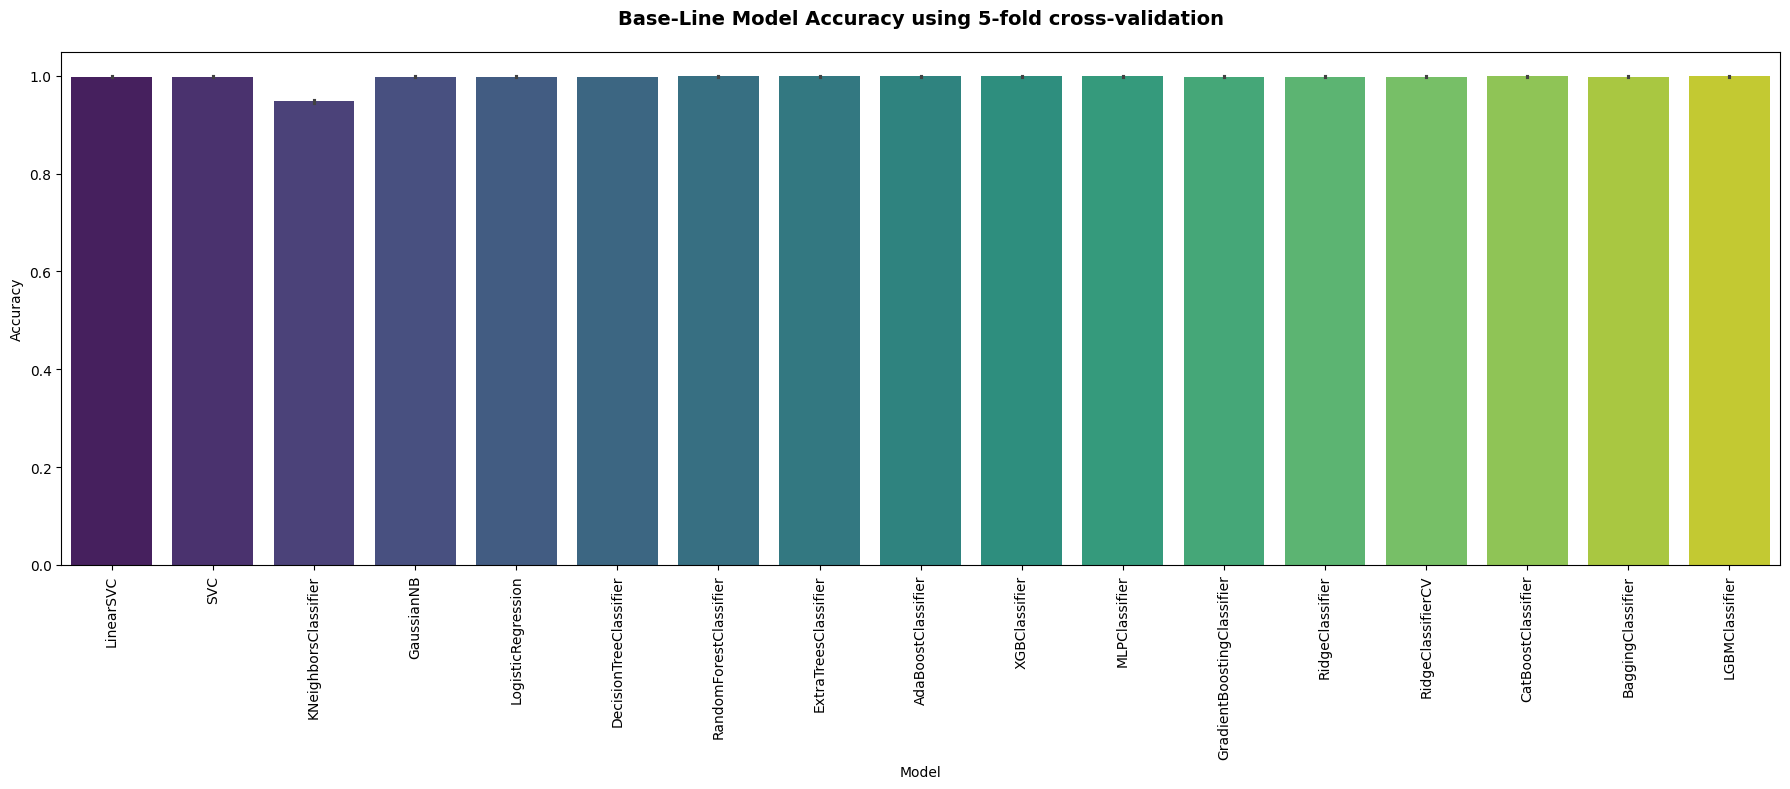

,Mean,Standard Deviation
model_name,,
AdaBoostClassifier,0.998982,0.000446
CatBoostClassifier,0.998982,0.000446
ExtraTreesClassifier,0.998982,0.000446
LGBMClassifier,0.998982,0.000446
RandomForestClassifier,0.998982,0.000446
MLPClassifier,0.998982,0.000594
XGBClassifier,0.998904,0.000328
GradientBoostingClassifier,0.998669,0.000594
BaggingClassifier,0.998512,0.000511


In [389]:
generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
       Hyperparameter tuning
    </h1>
</div>

In [390]:
import shap
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap.plots.bar(shap_values)
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [391]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score
)

def plot_metric(estimator, X_test, y_test, figsize=(12, 10), 
                show_threshold_analysis=True, metric = "accuracy", return_best_threshold=False):
    y_pred_prob = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)

    # Setup subplots
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    rocScore = roc_auc_score(y_test, y_pred_prob)
    ax[0, 0].plot(fpr, tpr, label=f"AUC = {rocScore:.2f}")
    ax[0, 0].plot([0, 1], [0, 1], "k--")
    ax[0, 0].set_title("ROC Curve", weight="bold")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].legend()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title("Confusion Matrix", weight="bold")
    ax[0, 1].set_xlabel("Predicted")
    ax[0, 1].set_ylabel("Actual")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"AUC = {pr_auc:.3f}")
    ax[1, 0].set_title("Precision-Recall Curve", weight="bold")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].legend()

    if show_threshold_analysis:
        thresholds = np.arange(0.1, 0.91, 0.05)
        result = {
            "Threshold": [],
            "Precision": [],
            "Recall": [],
            "F1-score": [],
            "Accuracy": []
        }

        for thresh in thresholds:
            y_thresh_pred = (y_pred_prob >= thresh).astype(int)
            p = precision_score(y_test, y_thresh_pred, zero_division=0)
            r = recall_score(y_test, y_thresh_pred, zero_division=0)
            f1 = f1_score(y_test, y_thresh_pred, zero_division=0)
            acc = accuracy_score(y_test, y_thresh_pred)

            result["Threshold"].append(round(thresh, 2))
            result["Precision"].append(round(p, 3))
            result["Recall"].append(round(r, 3))
            result["F1-score"].append(round(f1, 3))
            result["Accuracy"].append(round(acc, 3))

        df_result = pd.DataFrame(result)

        # Select the best threshold by metric
        metric_map = {
            "f1": "F1-score",
            "recall": "Recall",
            "precision": "Precision",
            "accuracy": "Accuracy"
        }

        if metric not in metric_map:
            raise ValueError("metric must be 'f1', 'recall', 'precision' or 'accuracy'")

        metric_col = metric_map[metric]
        best_idx = df_result[metric_col].idxmax()
        best_thresh = df_result.loc[best_idx, "Threshold"]

        # Plot threshold analysis on ax[1, 1]
        ax[1, 1].plot(df_result["Threshold"], df_result["Precision"], label="Precision", marker="o")
        ax[1, 1].plot(df_result["Threshold"], df_result["Recall"], label="Recall", marker="s")
        ax[1, 1].plot(df_result["Threshold"], df_result["F1-score"], label="F1-score", marker="^")
        ax[1, 1].plot(df_result["Threshold"], df_result["Accuracy"], label="Accuracy", marker="x")
        ax[1, 1].axvline(best_thresh, color="red", linestyle="--", label=f"Best ({metric_col}): {best_thresh:.2f}")
        ax[1, 1].set_title("Threshold vs Scores", weight="bold")
        ax[1, 1].set_xlabel("Threshold")
        ax[1, 1].set_ylabel("Score")
        ax[1, 1].legend()
    else:
        ax[1, 1].set_visible(False)

    plt.tight_layout()
    plt.show()

    # In classification report
    print("Classification Report (Threshold = 0.5):\n")
    print(classification_report(y_test, y_pred))

    if show_threshold_analysis:
        print("\n🔍 Threshold Tuning Table:\n")
        print(df_result)

    if return_best_threshold:
        return best_thresh

In [392]:
def predict_with_threshold(model, X, y_true, threshold=0.5, title="Confusion Matrix"):
    y_proba = model.predict_proba(X)[:, 1]
    
    y_pred = (y_proba >= threshold).astype(int)

    # In classification report
    print(f"\n📋 Classification Report (Threshold = {threshold:.2f}):\n")
    print(classification_report(y_true, y_pred, digits=3))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Vẽ heatmap confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{title} (Threshold = {threshold:.2f})", weight="bold")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    return y_pred

In [393]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, figsize = (15, 6), show_shap_plot = False, metric = "f1", show_threshold_analysis=True):
    global best_threshold
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    best_threshold = plot_metric(estimator = model, X_test = X_test, y_test = y_test, figsize = figsize, metric = metric,
                                 show_threshold_analysis = show_threshold_analysis, return_best_threshold = True)
    if show_shap_plot:
        shap_sample = X_test.iloc[:200] if isinstance(X_test, pd.DataFrame) else X_test[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [394]:
X_test = start_test_set.drop("Exited", axis=1)
y_test = start_test_set["Exited"].copy()
X_test_prepared = preprocessor.transform(X_test)

**Detailed workflow:**

* **Step 1: Optimize the model using Optuna with `scoring="accuracy"`**
  → This helps find the best set of **hyperparameters** that gives the highest overall prediction accuracy. However, since **Attrition is an imbalanced classification problem**, accuracy might not reflect the true performance (due to the dominance of **TN + TP in the majority class**).

* **Step 2: After training the best model**:
  → Use `plot_metric(..., metric="f1")` to analyze the model’s behavior across different thresholds.
  → Find the threshold that gives the **best F1-score**, which balances **false positives (FP)** and **false negatives (FN)**.

**Conclusion:**

* Use **accuracy** to find the best **model configuration** (hyperparameters)
* Use **F1-score** to decide on the most appropriate **classification threshold**

This is a **strategic separation of roles** between model optimization and decision thresholding — a best practice in real-world ML workflows.

  <p align="center">
    <img src="https://i.ibb.co/WvJ3VsWx/8-confusion-matrix-python.webp" width="600">
  </p>

  **Attrition is an imbalanced classification problem:**

  This means the number of employees who *did not leave* (Attrition = 0) is much larger than those who *did leave* (Attrition = 1).

  For example: 84% are labeled as 0, while only 16% are labeled as 1.

  So, if we evaluate the model using only **accuracy**, it can "cheat" by predicting everything as 0:

  🔹 Example: The model predicts all employees as “not leaving” (all 0s)
  → The **accuracy** can still be very high (around 84%)
  → But in reality, it completely fails to detect those who will leave (high FN), making the model useless

  The phrase **“TP + TN dominates”** means:

  Accuracy is calculated as:

  $$
  \text{Accuracy} = \frac{TP + TN}{TP + FP + TN + FN}
  $$

  In imbalanced problems, the model often gets a **high TN** (correctly predicting many non-leavers) easily. However, **TP** (correctly predicting who leaves) is rare. If the model misses many real leavers (high **FN**), the accuracy still looks good — but it’s misleading and does not reflect true model performance.

## AdaBoostClassifier 

In [395]:
def objective_ada(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=seed
    )

    score = cross_val_score(model, X=df_Churn_prepared, y=df_Churn_label,
                            cv=kfold, scoring="accuracy", n_jobs=-1)
    return score.mean()

study_ada = optuna.create_study(direction="maximize")
study_ada.optimize(objective_ada, n_trials=50, show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [396]:
study_ada.best_value

0.998375

In [397]:
study_ada.best_params

{'n_estimators': 89, 'learning_rate': 0.021949237987790932}

In [398]:
best_model_ada = AdaBoostClassifier(**study_ada.best_params, random_state=seed)
best_model_ada

AdaBoostClassifier(learning_rate=0.021949237987790932, n_estimators=89,
                   random_state=42)

Evaluating AdaBoostClassifier...


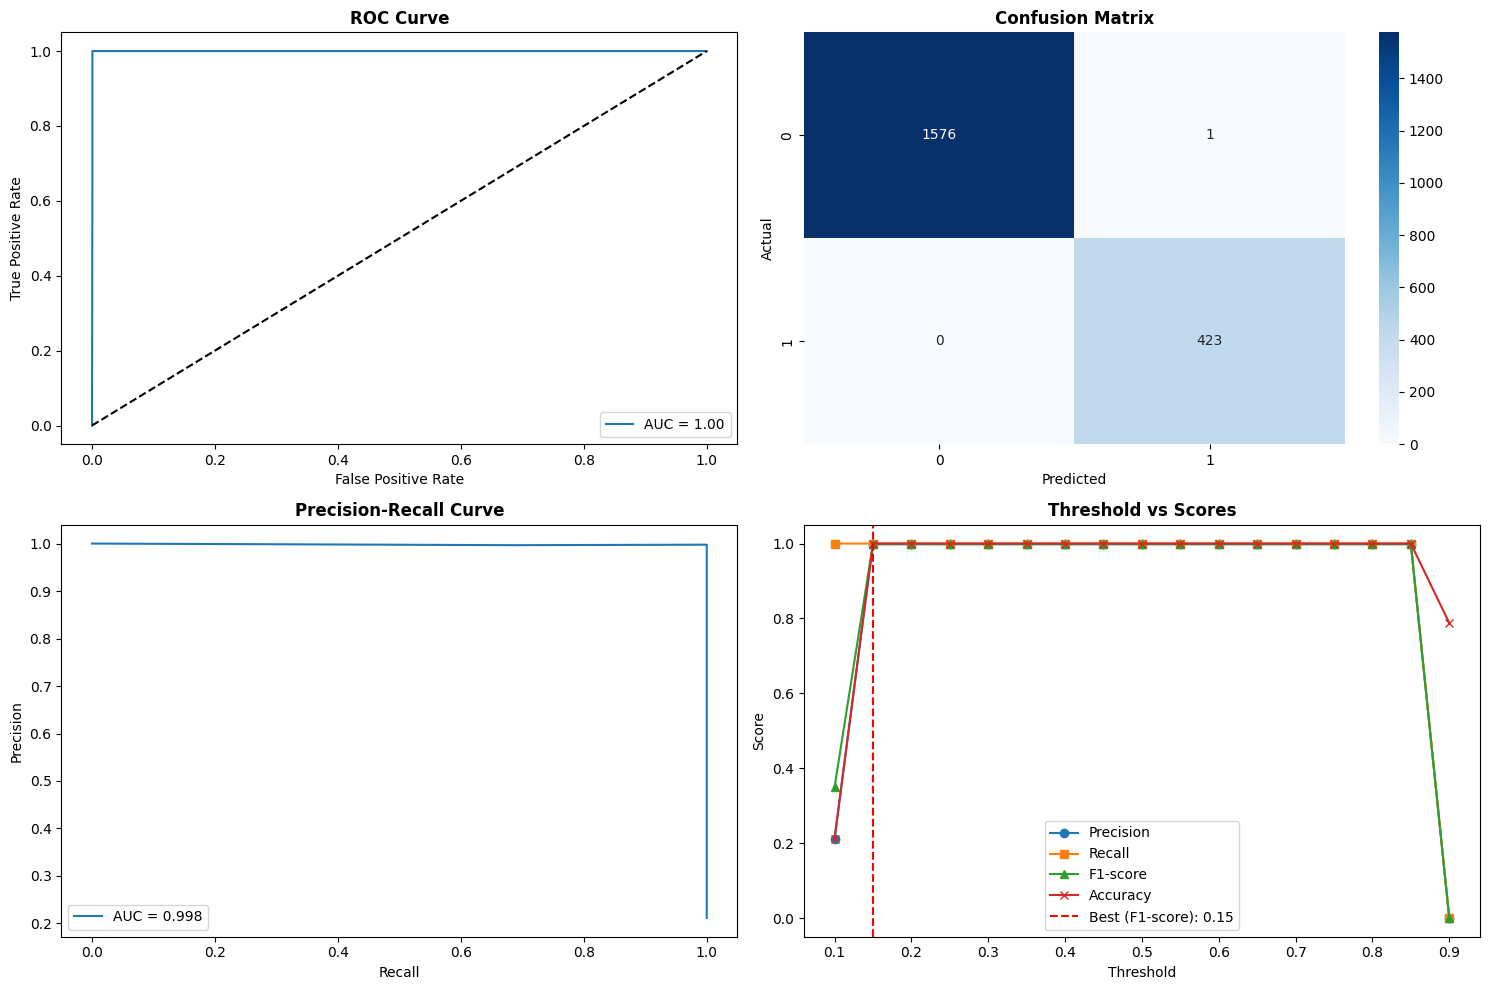

Classification Report (Threshold = 0.5):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1577
           1       1.00      1.00      1.00       423

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


🔍 Threshold Tuning Table:

    Threshold  Precision  Recall  F1-score  Accuracy
0        0.10      0.211     1.0     0.349     0.211
1        0.15      0.998     1.0     0.999     1.000
2        0.20      0.998     1.0     0.999     1.000
3        0.25      0.998     1.0     0.999     1.000
4        0.30      0.998     1.0     0.999     1.000
5        0.35      0.998     1.0     0.999     1.000
6        0.40      0.998     1.0     0.999     1.000
7        0.45      0.998     1.0     0.999     1.000
8        0.50      0.998     1.0     0.999     1.000
9        0.55      0.998     1.0     0.999     1.000
10       0.60      0

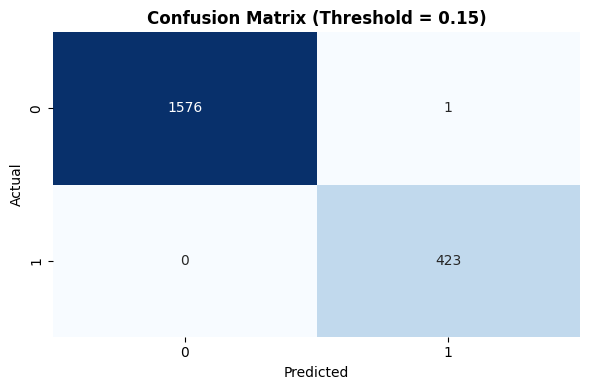

array([0, 0, 0, ..., 0, 1, 0], shape=(2000,))

In [399]:
evaluate_model(model = best_model_ada, X_train=X_resampled, X_test=X_test_prepared,
               y_train=y_resampled, y_test=y_test, figsize=(15, 10), show_threshold_analysis=True, metric="f1", show_shap_plot=False)
print("*"*100)
print("\n")
predict_with_threshold(model=best_model_ada, X = X_test_prepared, y_true = y_test, threshold=best_threshold)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Analyze Feature Complain</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Analyze Feature Complain
    </h1>
</div>

## Remove feature Complain

PermutationExplainer explainer: 101it [00:52,  1.57it/s]                         


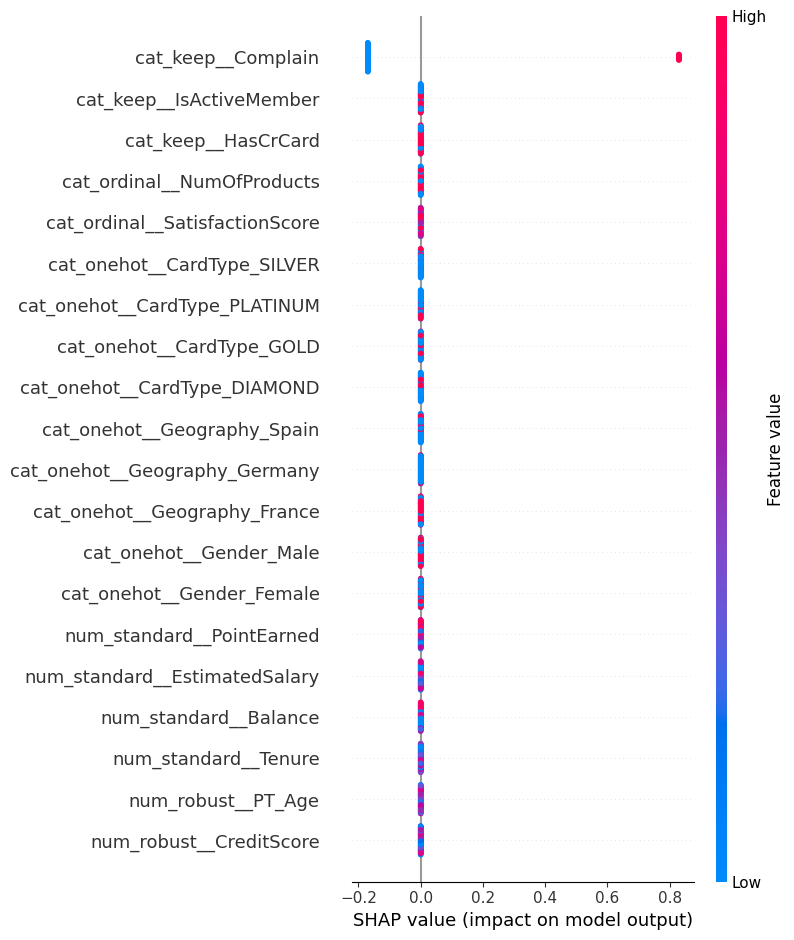

In [400]:
shap_sample = X_test_prepared.iloc[:200] if isinstance(X_test_prepared, pd.DataFrame) else X_test_prepared[:100]
shap_plot(model=best_model_ada, X_test=shap_sample, list_feature=list_feature_prepared)

| Complain | Exited = 0 | Exited = 1 |
| -------- | ------------------ | ------------------- |
| 0        | **99.95%**         | 0.05%               |
| 1        | 0.49%              | **99.51%**          |

If Complain = 1 → the customer is almost certainly Exited = 1.
If Complain = 0 → the customer is almost certainly Exited = 0.

⟶ This means Complain almost perfectly separates the target classes, so:

The model learns a simple rule:
➤ "As long as I know Complain, I don’t need to consider anything else."

As a result, other features are ignored by the model, leading to their SHAP values being close to zero.

| Issue                                       | Explanation                                                                                                                                   |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| ⚠️ **Leakage**                              | `Complain` almost directly **reveals the target label `Exited`**, so the model ends up learning the "answer" rather than underlying patterns. |
| ⚠️ **Masking the impact of other features** | Features like `Satisfaction Score`, `Card Type`, and `EstimatedSalary` are ignored because `Complain` dominates the prediction.               |
| ⚠️ **Not useful for early prediction**      | `Complain` typically occurs **after the customer is already dissatisfied**, so it doesn't help with proactive or early churn prediction.      |


In [401]:
df_Churn_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'SatisfactionScore', 'CardType', 'PointEarned', 'PT_Age'],
      dtype='object')

In [402]:
df_Churn_new.drop(columns="Complain", axis=1, inplace=True)
df_Churn_new.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,SatisfactionScore,CardType,PointEarned,PT_Age
4127,712,Spain,Male,9,0.000000,1,1,1,117977.453125,1,GOLD,294,1.240889
2218,733,Spain,Female,9,102289.851562,1,1,1,115441.656250,2,PLATINUM,239,-0.739632
2547,682,Spain,Female,0,122661.390625,1,0,1,84803.757812,1,PLATINUM,686,1.689623
449,778,Spain,Female,6,127299.343750,2,1,0,124694.992188,2,GOLD,859,0.871992
2128,743,France,Male,8,69143.906250,2,0,1,105780.179688,3,PLATINUM,785,-0.035945


In [403]:
list_feature_cat_keep.remove("Complain")

## Re-run Comparison Models

In [404]:
preprocessor_new = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_ordinal", cat_ordinal_transformer, list_feature_cat_ordinal),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor_new.fit(df_Churn_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['CreditScore', 'PT_Age']),
                                ('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Tenure', 'Balance', 'EstimatedSalary',
                                  'PointEarned']),
                                ('cat_onehot',
                                 Pipeline(steps...
                                 ['Gender', 'Geography', 'CardType']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['SatisfactionScore', 'NumOfProducts']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HasCrCard', 'IsActiveMember'])])

In [405]:
df_Churn_prepared_new = preprocessor_new.transform(df_Churn_new)

In [406]:
list_feature_prepared_new = preprocessor_new.get_feature_names_out().tolist()
list_feature_prepared_new

['num_robust__CreditScore',
 'num_robust__PT_Age',
 'num_standard__Tenure',
 'num_standard__Balance',
 'num_standard__EstimatedSalary',
 'num_standard__PointEarned',
 'cat_onehot__Gender_Female',
 'cat_onehot__Gender_Male',
 'cat_onehot__Geography_France',
 'cat_onehot__Geography_Germany',
 'cat_onehot__Geography_Spain',
 'cat_onehot__CardType_DIAMOND',
 'cat_onehot__CardType_GOLD',
 'cat_onehot__CardType_PLATINUM',
 'cat_onehot__CardType_SILVER',
 'cat_ordinal__SatisfactionScore',
 'cat_ordinal__NumOfProducts',
 'cat_keep__HasCrCard',
 'cat_keep__IsActiveMember']

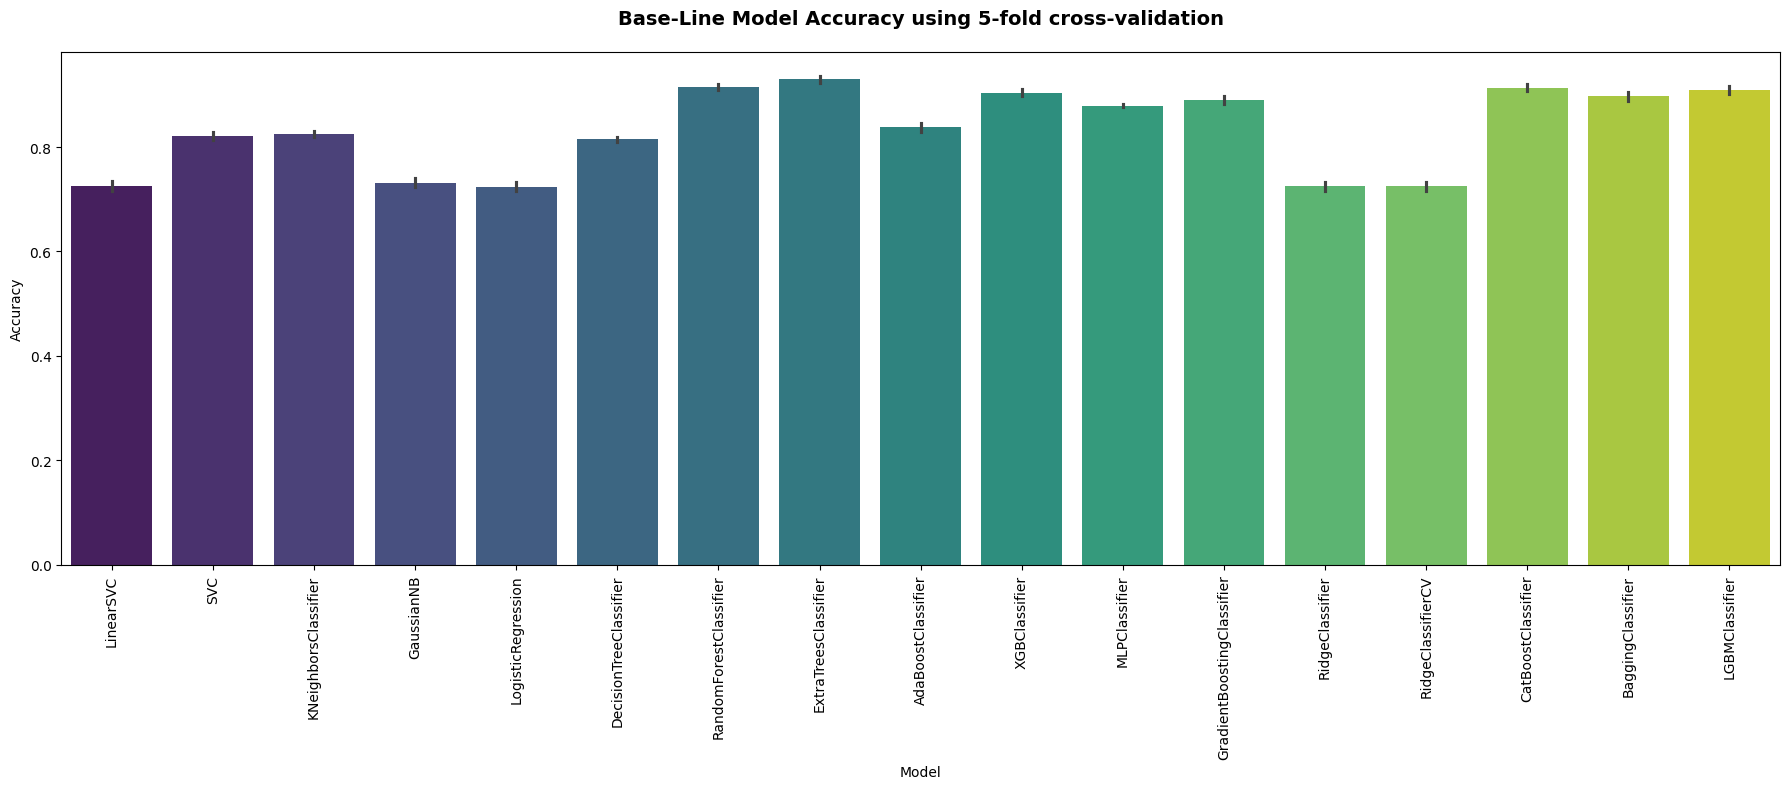

,Mean,Standard Deviation
model_name,,
ExtraTreesClassifier,0.929757,0.007936
RandomForestClassifier,0.915897,0.007857
CatBoostClassifier,0.913391,0.008585
LGBMClassifier,0.909945,0.010333
XGBClassifier,0.903759,0.009050
BaggingClassifier,0.897338,0.010540
GradientBoostingClassifier,0.890290,0.008939
MLPClassifier,0.879092,0.003384
AdaBoostClassifier,0.837823,0.010327


In [409]:
X_resampled_new, y_resampled_new = smote.fit_resample(df_Churn_prepared_new, df_Churn_label)
generate_baseline_results(X=X_resampled_new, y=y_resampled_new, plot_result = True)

## Re-Tuning Hyperparameter

### ExtraTreesClassifier

In [410]:
def objective_etc(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "n_jobs": -1
    }

    model = ExtraTreesClassifier(**params, random_state=seed)

    score = cross_val_score(model, X=X_resampled_new, y=y_resampled_new,
                            cv=kfold, scoring="accuracy", n_jobs=-1)
    return score.mean()

study_etc = optuna.create_study(direction="maximize")
study_etc.optimize(objective_etc, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

In [411]:
study_etc.best_value

0.931636648394675

In [412]:
study_etc.best_params

{'n_estimators': 500,
 'max_depth': 28,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'bootstrap': False}

In [413]:
best_model_etc = ExtraTreesClassifier(**study_etc.best_params, random_state=seed)
best_model_etc

ExtraTreesClassifier(max_depth=28, max_features='log2', n_estimators=500,
                     random_state=42)

In [414]:
X_test_new = X_test.drop("Complain", axis=1)
X_test_prepared_new = preprocessor_new.transform(X_test_new)

Evaluating ExtraTreesClassifier...


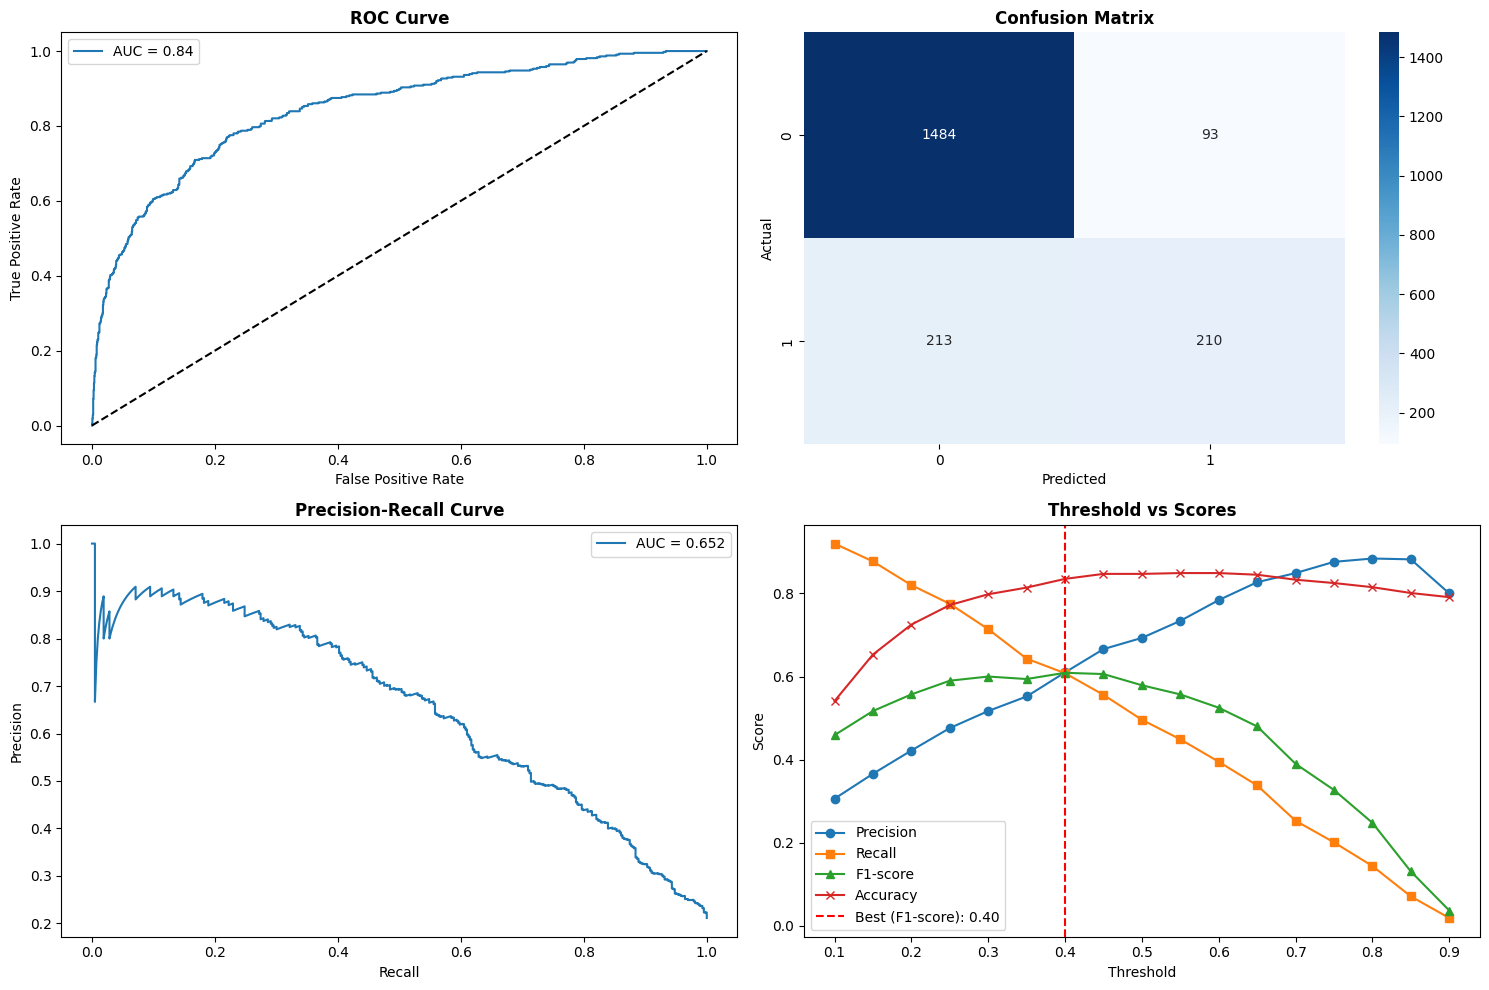

Classification Report (Threshold = 0.5):

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1577
           1       0.69      0.50      0.58       423

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


🔍 Threshold Tuning Table:

    Threshold  Precision  Recall  F1-score  Accuracy
0        0.10      0.306   0.920     0.459     0.541
1        0.15      0.366   0.877     0.517     0.653
2        0.20      0.422   0.820     0.557     0.725
3        0.25      0.476   0.775     0.590     0.772
4        0.30      0.517   0.714     0.600     0.798
5        0.35      0.552   0.643     0.594     0.814
6        0.40      0.610   0.608     0.609     0.835
7        0.45      0.666   0.556     0.606     0.847
8        0.50      0.693   0.496     0.579     0.847
9        0.55      0.734   0.449     0.557     0.849
10       0.60      0

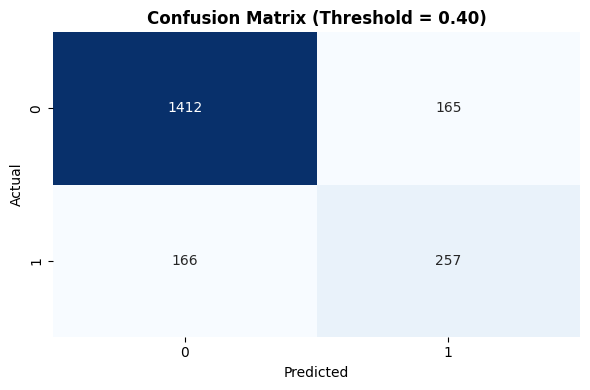

array([0, 0, 0, ..., 0, 1, 1], shape=(2000,))

In [415]:
evaluate_model(model = best_model_etc, X_train=X_resampled_new, X_test=X_test_prepared_new,
               y_train=y_resampled_new, y_test=y_test, figsize=(15, 10), show_threshold_analysis=True, metric="f1", show_shap_plot=False)
print("*"*100)
print("\n")
predict_with_threshold(model=best_model_etc, X = X_test_prepared_new, y_true = y_test, threshold=best_threshold)

### RandomForestClassifier

In [417]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params, random_state=seed)

    score = cross_val_score(model, X=X_resampled_new, y=y_resampled_new,
                            cv=kfold, scoring="accuracy", n_jobs=-1)
    return score.mean()

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

In [418]:
study_rf.best_value

0.9210649960845732

In [419]:
study_rf.best_params

{'n_estimators': 435,
 'max_depth': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [420]:
best_model_rf = RandomForestClassifier(**study_rf.best_params, random_state=seed, n_jobs=-1)
best_model_rf

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=435,
                       n_jobs=-1, random_state=42)

Evaluating RandomForestClassifier...


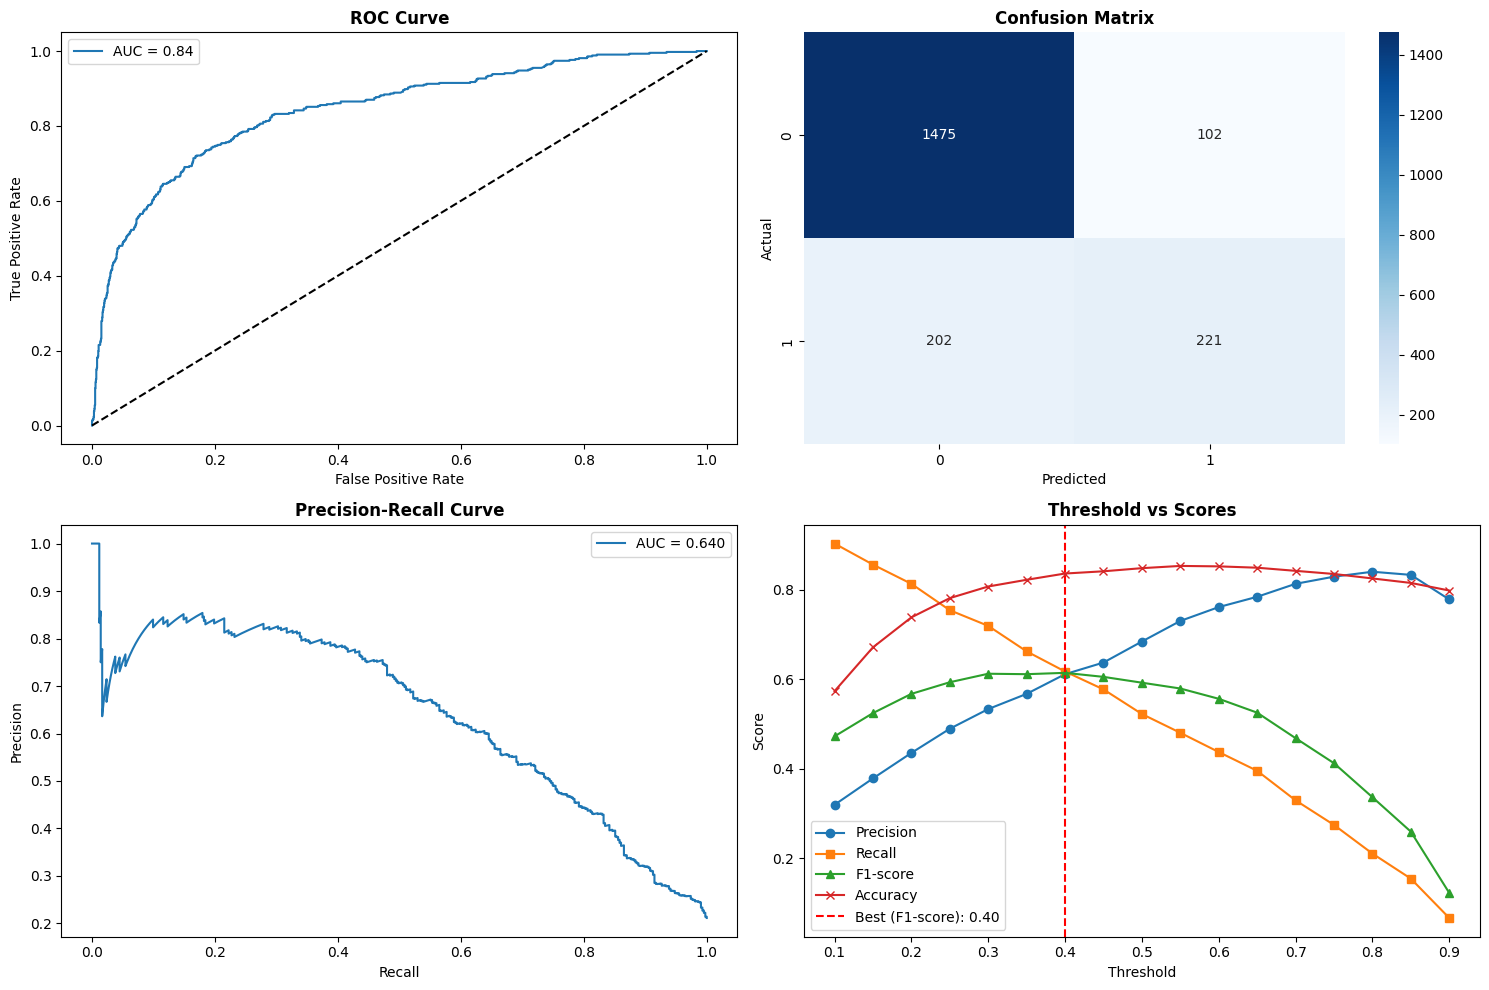

Classification Report (Threshold = 0.5):

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1577
           1       0.68      0.52      0.59       423

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000


🔍 Threshold Tuning Table:

    Threshold  Precision  Recall  F1-score  Accuracy
0        0.10      0.319   0.903     0.472     0.573
1        0.15      0.378   0.856     0.524     0.671
2        0.20      0.435   0.813     0.567     0.738
3        0.25      0.489   0.754     0.593     0.781
4        0.30      0.533   0.719     0.612     0.807
5        0.35      0.567   0.662     0.611     0.822
6        0.40      0.611   0.617     0.614     0.836
7        0.45      0.637   0.577     0.605     0.841
8        0.50      0.684   0.522     0.592     0.848
9        0.55      0.730   0.480     0.579     0.853
10       0.60      0

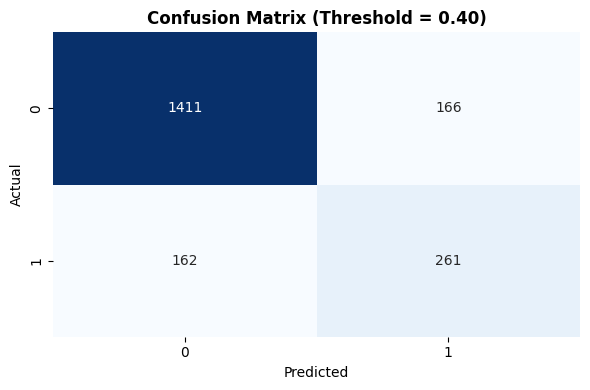

array([0, 0, 0, ..., 0, 1, 1], shape=(2000,))

In [421]:
evaluate_model(model = best_model_rf, X_train=X_resampled_new, X_test=X_test_prepared_new,
               y_train=y_resampled_new, y_test=y_test, figsize=(15, 10), show_threshold_analysis=True, metric="f1", show_shap_plot=False)
print("*"*100)
print("\n")
predict_with_threshold(model=best_model_rf, X = X_test_prepared_new, y_true = y_test, threshold=best_threshold)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

PermutationExplainer explainer: 201it [10:02,  3.06s/it]                         


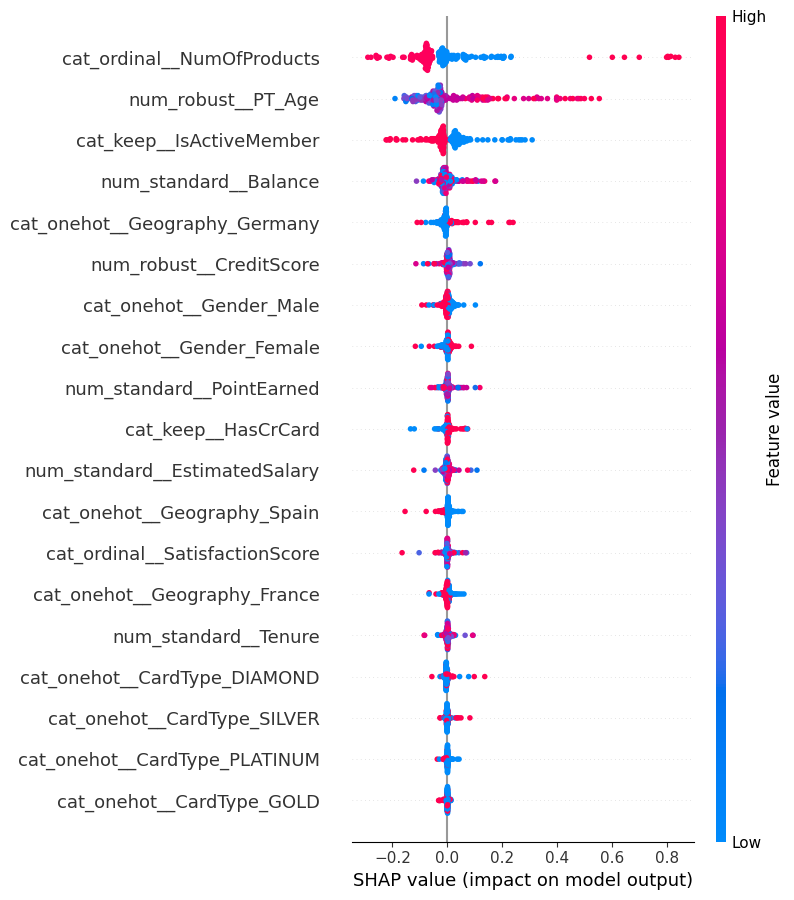

In [423]:
shap_sample = X_test_prepared_new.iloc[:200] if isinstance(X_test_prepared_new, pd.DataFrame) else X_test_prepared_new[:200]
shap_plot(model=best_model_rf, X_test=shap_sample, list_feature=list_feature_prepared_new)

**Detailed Analysis by Feature Groups**

**Top Most Important Features**

`cat_ordinal__NumOfProducts`

* This has the strongest impact.
* **Higher values (red)** tend to **decrease** the SHAP value → less likely to churn.
* **Lower values (blue)** → increase SHAP → more likely to churn.

`num_robust__PT_Age`

* **Older customers (red)** tend to have negative SHAP → less likely to churn.
* **Younger customers (blue)** tend to have positive SHAP → more likely to churn.

`cat_keep__IsActiveMember`

* **Active members (red)** → SHAP is negative → less likely to churn.
* **Inactive members (blue)** → SHAP is positive → more likely to churn.

`num_standard__Balance`

* Appears evenly distributed around 0.
* No clear pattern between high/low values and churn.

 **Categorical Features (One-Hot Encoded)**

* `cat_onehot__Geography_Germany`: High value tends to **reduce** churn (negative SHAP).
* `cat_onehot__Geography_Spain`: Slightly increases churn.
* `cat_onehot__Geography_France`: SHAP values cluster around 0 → little influence.
* `cat_onehot__Gender_Male` & `cat_onehot__Gender_Female`: Small, mixed influence.

**Other Notable Features**

* `cat_keep__HasCrCard`: No clear effect (SHAP values close to 0).
* `num_standard__EstimatedSalary`: Very little influence.
* `cat_ordinal__SatisfactionScore`: Close to 0 SHAP → not an important factor for the model.

**CardType Features**

* `cat_onehot__CardType_*`: Extremely small SHAP values, almost no impact on model output. The model does not consider card type as relevant to churn prediction.

**General Observations**

1. **Top 3 most important features for churn prediction**:

   * Number of products (`NumOfProducts`)
   * Age (`PT_Age`)
   * Active member status (`IsActiveMember`)
2. Demographic features (gender, geography, card type) have **limited impact**.
3. Features like salary, credit score, and balance are **not key drivers** of churn in this model.  

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Solution</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #8B4513; 
    padding: 10px; 
    background: linear-gradient(135deg, #d73027, #fdae61 40%, #a6d96a 80%, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Solution
    </h1>
</div>

**Proposed Solutions to Reduce Customer Churn**

**1. Increase the Number of Products Used by Customers**
- **Observation:** Customers who use more products (NumOfProducts) are less likely to churn.
- **Solution:**  
  - Promote **cross-selling**: introduce additional products such as credit cards, loans, savings, etc.
  - Create **service bundles** with incentives for customers using multiple products.
  - Develop a **loyalty program** based on the number of products owned.

**2. Reactivate Inactive Customers**
- **Observation:** Inactive customers (IsActiveMember=0) have a much higher risk of churning.
- **Solution:**  
  - Send **reminders** and personalized offers to this group.
  - Offer **gifts or reward points** when customers return to using services.
  - Monitor behavior and proactively reach out via phone or email.

**3. Focus on Older Customer Segments**
- **Observation:** Older customers (high PT_Age) tend to churn more.
- **Solution:**  
  - Simplify interfaces and increase phone support.
  - Organize **financial advisory programs** tailored for older customers.
  - Prioritize quick support for complaints from this group.

**4. Customize by Geography**
- **Observation:** Customers in **Germany** have the highest churn rate.
- **Solution:**  
  - Survey and identify the root causes of dissatisfaction in Germany.
  - Develop **region-specific retention programs**, especially for Germany.
  - Use Spain as a benchmark for best practices.

**5. Improve Customer Satisfaction**
- **Observation:** Higher satisfaction scores are associated with lower churn rates.
- **Solution:**  
  - Send surveys after each interaction and resolve complaints quickly.
  - Invest in **customer service** (chatbots, 24/7 hotlines).
  - Train staff in customer care skills.

**6. Take Care of High-Value Customers**
- **Observation:** Customers with large account balances are generally more loyal.
- **Solution:**  
  - Create a **VIP group**: offer fee waivers, higher transaction limits, and dedicated financial advice.
  - Proactively engage and invite them to special events.

**Summary:**  
Focus on customer groups with high churn risk (few products, inactive, older, in Germany, low satisfaction), while boosting cross-selling, personalizing services, and enhancing customer experience to effectively reduce churn.